In [54]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

In [55]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [56]:
data=10000
batch=100
set=100
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
c_reg1=0.05
c_reg2=0.0003
d=4

m^2= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=3.4496416690023715>
lam= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.5313675879208728>
alpha= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=-0.10637385822492229>
beta= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=-0.16646923185576856>
<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([2.37577684, 3.26120861, 1.03695007, 2.66946827, 1.04809924,
       1.25576279, 3.29711535, 5.48223108, 0.58918617, 2.37869646])>


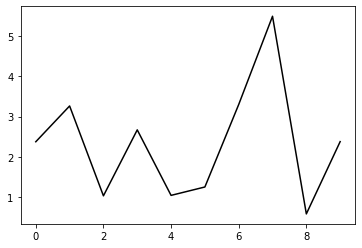

In [57]:
h=tf.zeros(layer)
h_in=[]
for i in range (layer):
    h_inn=np.float64(np.random.normal(2, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
m2=tf.Variable(np.float64(np.random.normal(2, 1)))
lam=tf.Variable(np.float64(np.random.normal(1, 1)))
alpha=tf.Variable(np.float64(np.random.uniform(-0.5, 0.5)))
beta=tf.Variable(np.float64(np.random.uniform(-0.5, 0.5)))
#m2=tf.constant(np.float64(5.6))
#lam=tf.constant(np.float64(0.61))
#alpha=tf.constant(np.float64(1.444635))
#beta=tf.constant(np.float64(0.00615))
print("m^2=", m2)
print("lam=", lam)
print("alpha=", alpha)
print("beta=", beta)
print(h)
plt.plot(h.numpy(), 'k-')
plt.show()

In [58]:
def F_func(m, la, a,b):
    return 2*b/n_fin-m*a-la*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

In [59]:
x=[i*0.2 for i in range (30)]
y=[0.0, 0.018, 0.035, 0.053, 0.0715, 0.0895, 0.107, 0.125, 0.146, 0.1665, 0.1875, 0.2085, 0.229, 0.25, 0.265, 0.281, 0.296, 0.3115, 0.3275, 0.343, 0.3565, 0.385, 0.4375, 0.5, 0.6, 0.675, 0.735, 0.815, 0.865, 0.885]
y[:]=[2*v for v in y]
fp1 = np.polyfit(x, y, 15)
print(fp1)

[ 1.59046394e-05 -6.81729682e-04  1.31412795e-02 -1.50525136e-01
  1.14052774e+00 -6.02241647e+00  2.27455168e+01 -6.20704699e+01
  1.22166922e+02 -1.71187074e+02  1.66428955e+02 -1.07461552e+02
  4.28229887e+01 -9.20544914e+00  9.55260239e-01 -1.30911492e-04]


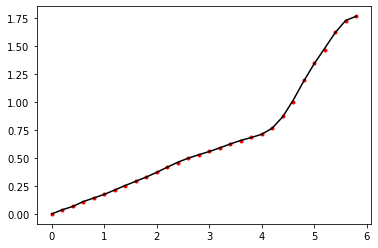

In [60]:
def f(x):
    y=0
    for i in range (16):
        y=y+fp1[i]*x**(15-i)
    return y
yy=[f(i*0.2) for i in range (30)]
plt.plot(x, y, 'r.')
plt.plot(x, yy, 'k-')
plt.show()

In [61]:
def NN_func_p(f):
    Positive=[]
    append=Positive.append
    while len(Positive)<batch:
        H=np.random.uniform(0.0, 6.0)
        M=np.random.uniform(0.0, 2.0)
        noise=np.abs(np.random.normal(0, 0.1))
        if np.abs(M-f(H))<=noise: append([H, M])
        else: continue
    return Positive
def NN_func_n(f):
    Negative=[]
    append=Negative.append
    while len(Negative)<batch:
        H=np.random.uniform(0.0, 6.0)
        M=np.random.uniform(0.0, 2.0)
        noise=np.abs(np.random.normal(0, 0.1))
        if np.abs(M-f(H))>noise: append([H, M])
        else: continue
    return Negative

In [62]:
Positive=[]
Negative=[]
for i in range (set):
    Positive.insert(i, NN_func_p(f))
    Negative.insert(i, NN_func_n(f))

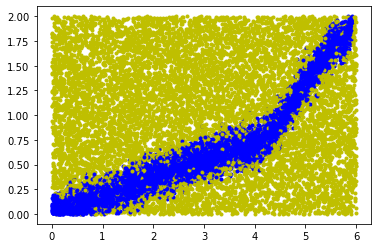

In [63]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive[i]])
    y_data1.insert(i, [v[1] for v in Positive[i]])
    x_data2.insert(i, [v[0] for v in Negative[i]])
    y_data2.insert(i, [v[1] for v in Negative[i]])
    plt.plot(x_data2[i], y_data2[i], 'y.')
    plt.plot(x_data1[i], y_data1[i], 'b.')
plt.show()

In [64]:
def Dfunc(hh, m):
    D=tf.math.sqrt(tf.math.abs(1+4*m/(hh[0]**2)))
    return D

In [65]:
def LP2(hh, m, la, alpha, beta, HH, MM):
    D=Dfunc(hh, m)
    phi=alpha*HH+beta*MM
    pi=(d/2)*(D-1)*alpha*HH+(d/2)*(-D-1)*beta*MM
    for j in range (layer-1):
        phi1=phi+dn*pi
        pi1 =phi*m*dn+(1-dn*hh[j])*pi+dn*la*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_01(hh, m, la, alpha, beta, list_hr):
    PP=[]
    NN=[]
    H=np.array(list_hr)[:, 0]
    M=np.array(list_hr)[:, 1]
    F=np.array(tf.math.abs(LP2(hh, m, la, alpha, beta, H, M)[1]))
    for i in range (len(H[F<0.1])):
        PP.append([H[F<0.1][i], M[F<0.1][i]])
    for i in range (len(H[F>=0.1])):
        NN.append([H[F>=0.1][i], M[F>=0.1][i]])
    return PP, NN

In [66]:
Positive0=[]
Positive1=[]
Negative0=[]
Negative1=[]
for i in range (set):
    Positive0.insert(i, NN_func_01(h, m2, lam, alpha, beta, Positive[i])[0])
    Positive1.insert(i, NN_func_01(h, m2, lam, alpha, beta, Positive[i])[1])
    Negative0.insert(i, NN_func_01(h, m2, lam, alpha, beta, Negative[i])[0])
    Negative1.insert(i, NN_func_01(h, m2, lam, alpha, beta, Negative[i])[1])

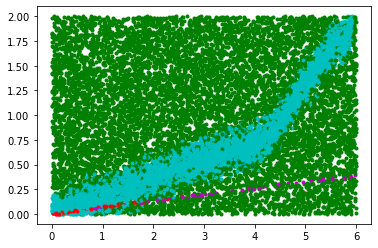

In [67]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
x_data3=[]
y_data3=[]
x_data4=[]
y_data4=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive0[i]])
    y_data1.insert(i, [v[1] for v in Positive0[i]])
    x_data2.insert(i, [v[0] for v in Positive1[i]])
    y_data2.insert(i, [v[1] for v in Positive1[i]])
    x_data3.insert(i, [v[0] for v in Negative0[i]])
    y_data3.insert(i, [v[1] for v in Negative0[i]])
    x_data4.insert(i, [v[0] for v in Negative1[i]])
    y_data4.insert(i, [v[1] for v in Negative1[i]])
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'c.')
    plt.plot(x_data1[i], y_data1[i], 'r.')
    plt.plot(x_data3[i], y_data3[i], 'm.')
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [68]:
def Error_func(hh, m, la, alpha, beta, list1, list2):
    H0=np.array([v[0] for v in list1])
    M0=np.array([v[1] for v in list1])
    H1=np.array([v[0] for v in list2])
    M1=np.array([v[1] for v in list2])
    H_0, M_0=LP2(hh, m, la, alpha, beta, H0, M0)
    H_1, M_1=LP2(hh, m, la, alpha, beta, H1, M1)
    PPlist=t_func(M_0)
    NNlist=t_func(M_1)
    sum_p=sum(PPlist)/batch
    sum_n=(batch-sum(NNlist))/batch

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return sum_n+sum_p+E_reg1+E_reg2

In [69]:
for i in range (set):
    print(Error_func(h, m2, lam, alpha, beta, Positive[i], Negative[i]))

tf.Tensor(1.308073439375068, shape=(), dtype=float64)
tf.Tensor(1.3325870573203995, shape=(), dtype=float64)
tf.Tensor(1.3142142137795843, shape=(), dtype=float64)
tf.Tensor(1.3144877930830232, shape=(), dtype=float64)
tf.Tensor(1.3321234781556999, shape=(), dtype=float64)
tf.Tensor(1.3258187038822264, shape=(), dtype=float64)
tf.Tensor(1.324503140016968, shape=(), dtype=float64)
tf.Tensor(1.3440309779073645, shape=(), dtype=float64)
tf.Tensor(1.341248530433509, shape=(), dtype=float64)
tf.Tensor(1.3449325533924354, shape=(), dtype=float64)
tf.Tensor(1.3244283955051042, shape=(), dtype=float64)
tf.Tensor(1.3149980739204954, shape=(), dtype=float64)
tf.Tensor(1.3439574572291604, shape=(), dtype=float64)
tf.Tensor(1.3175651237492223, shape=(), dtype=float64)
tf.Tensor(1.3144014443189087, shape=(), dtype=float64)
tf.Tensor(1.3262638137508844, shape=(), dtype=float64)
tf.Tensor(1.344588801086715, shape=(), dtype=float64)
tf.Tensor(1.3343819790256, shape=(), dtype=float64)
tf.Tensor(1.31444

# Optimize

100 1.297949562887192
3.458004896464668 0.5397308538005825 -0.11473772388618607 -0.15810540844365403
[2.32577797 3.21120874 1.08694994 2.61946857 1.09809863 1.30576087
 3.24712535 5.43223596 0.63918301 2.42868954]


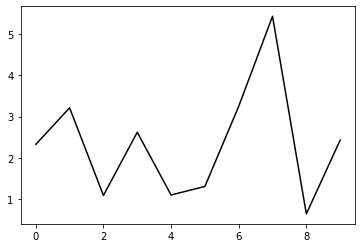

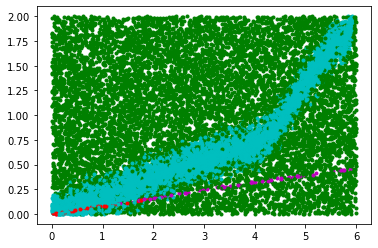

10100 0.888722886625412
3.453439728723691 0.5392591526650944 -0.1696676244923406 -0.1277215013614912
[2.14442123 2.18432295 2.13606152 2.09198886 2.02860651 1.96990657
 1.96299827 1.97400369 0.87675951 6.82615508]


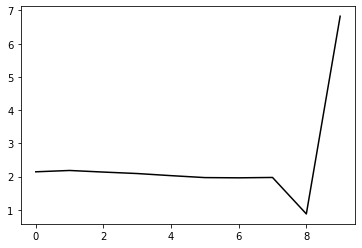

20100 1.0037274795911344
3.5397312329676938 0.4628181356905875 -0.25029833119602596 0.005547658027055305
[1.4515472  1.46454943 1.49322414 1.52059924 1.58142225 1.67068221
 1.83783786 2.18780979 3.17580637 8.56256491]


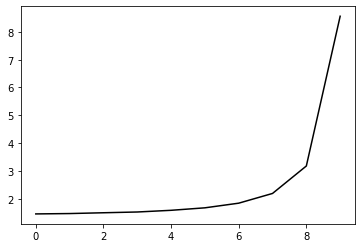

30100 1.0039138456009882
3.5373724359498144 0.4628177874031347 -0.24966687832454715 0.005852169733627728
[1.7739769  1.73184659 1.80063187 1.73375101 1.81723431 1.787529
 1.9203706  2.16589117 3.13874042 8.55645662]


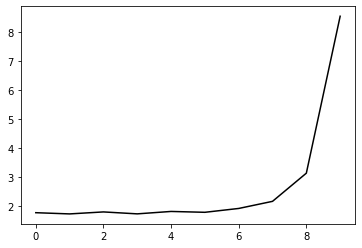

40100 0.9931281980709709
3.5310425406293064 0.4628172580978653 -0.24796557774492228 0.02324125691505161
[2.17897153 2.1699643  2.18529826 2.18722573 2.21930159 2.26086774
 2.37894028 2.65731574 3.59218843 8.65651864]


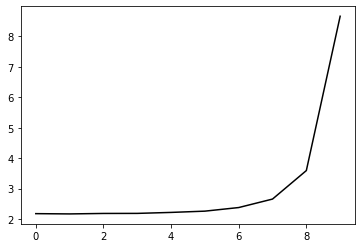

50100 1.003010494299722
3.522207282814462 0.4628167182094609 -0.24595156495134074 0.0205671277800472
[2.50435186 2.53684679 2.50325993 2.54817887 2.53038206 2.61018481
 2.66922821 2.93178711 3.77697813 8.68784157]


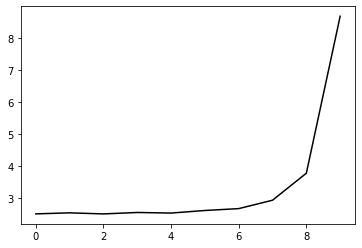

60100 0.992672564406987
3.5117551084005143 0.4628164078695567 -0.24366487158476477 0.01548723913739251
[2.78256505 2.79185712 2.78468955 2.80180839 2.80978014 2.85727935
 2.93562317 3.17088523 3.97847033 8.73107524]


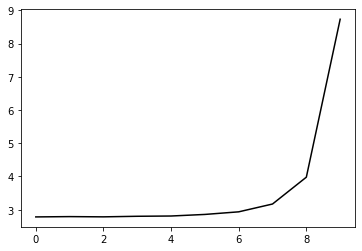

70100 1.0036439749936377
3.552283808108885 0.4065655580071415 -0.2778207468730051 0.018893434053477355
[2.80283552 2.9087084  3.02310698 3.11661364 3.17873041 3.21195009
 3.25035016 3.4052247  4.14809733 8.77559731]


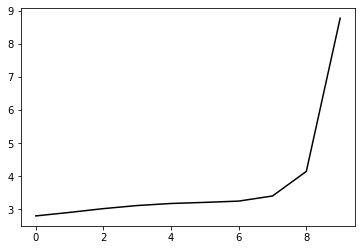

80100 0.9926316237157377
3.54415985055868 0.40656562544028324 -0.27407192169401734 0.016115050356826366
[2.98276066 3.01036048 2.97910756 3.02116469 3.00475407 3.08028875
 3.13608527 3.38342387 4.17856811 8.77256695]


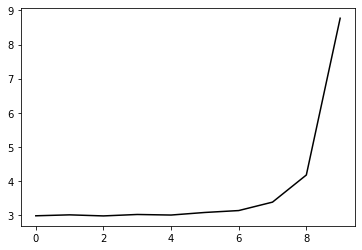

90100 1.0026870917718727
3.5629770088586126 0.35084735786898524 -0.21528157534794018 0.04662725502163131
[3.35834289 3.32580146 3.30442004 3.27586019 3.23115136 3.1753674
 3.1347912  3.21112694 3.88597134 8.68440572]


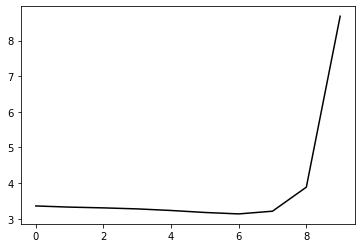

100100 1.003509527179981
3.514028380374966 0.3462620239419985 -0.17961797420620257 0.0407215084393316
[3.76448424 3.70717673 3.64491628 3.55738883 3.44073471 3.2988085
 3.15302735 3.08926588 3.57239102 8.63778963]


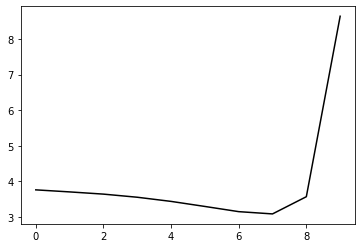

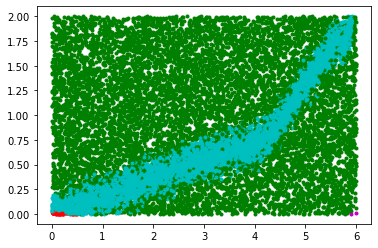

110100 1.0065777103861966
3.5139038354839798 0.37513923594090937 -0.21689731673072357 -0.015338849358103944
[4.37665514 3.86420549 3.37547664 3.04962996 2.86986902 2.78119094
 2.7535387  2.84727958 3.4831963  8.63153183]


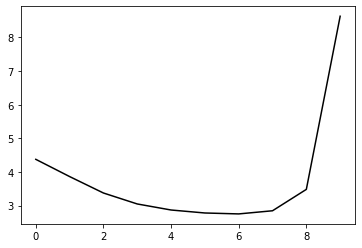

120100 1.00272083540046
3.5007381927065273 0.31192018609117456 -0.16939554751409766 0.02520927930539609
[3.65796086 3.68735686 3.69883821 3.67832828 3.62602319 3.54747913
 3.44808603 3.36802268 3.69884208 8.62724239]


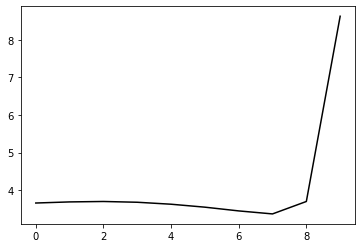

130100 0.9862983367176574
3.455333663187248 0.2885511602160482 -0.10168556226542412 -0.061392904328300135
[3.9396378  3.72382693 3.54930363 3.37662016 3.21088032 3.05815068
 2.93066799 2.90157355 3.38691931 8.66142156]


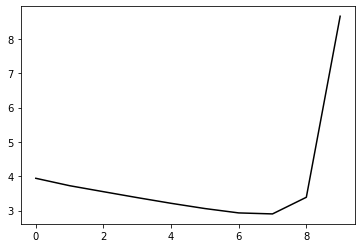

140100 1.0023667691958693
3.4377901324136437 0.3018211720874347 -0.11383517057399785 -0.05987147929597792
[4.14698733 4.1319373  4.09343576 4.03714851 3.96562422 3.88740296
 3.82256769 3.83753343 4.33402131 8.79781851]


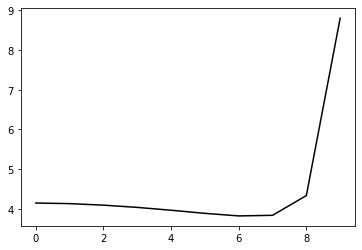

150100 0.9943417981332242
3.3647097778028465 0.3232903973964898 -0.12414314495986482 -0.052800547309222345
[4.06952246 4.19373689 4.17985924 4.14143052 4.07416652 3.96679452
 3.82750308 3.73153661 4.08176593 8.78415558]


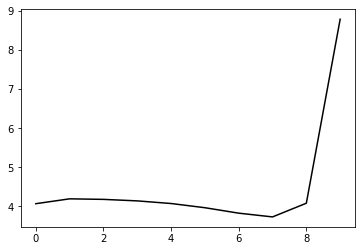

160100 1.0065406020583854
3.300889009515678 0.34228300916841053 -0.12687733899306078 -0.045143906777957044
[4.2304796  3.9664805  3.86272261 3.8160325  3.77730172 3.74986832
 3.75778803 3.89641399 4.43620977 8.81378608]


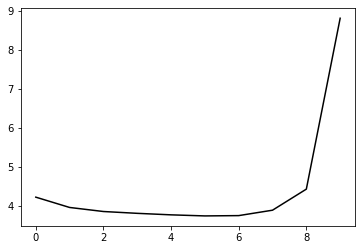

170100 0.975899046701684
3.150494421720853 0.4061812307724514 -0.1310588835775626 -0.03197621231130986
[4.19070021 4.14871896 4.0794751  3.99013005 3.88550086 3.7696021
 3.65317806 3.58060867 3.91070197 8.7107303 ]


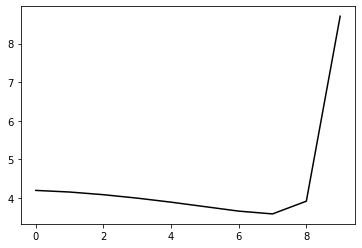

180100 1.0196790023278917
3.0194269011793224 0.4286356654447634 -0.18119639259550782 0.05632560469309694
[4.23553834 3.89830673 3.68392802 3.56253923 3.4989741  3.45790032
 3.42471729 3.43928206 3.9027296  8.71727895]


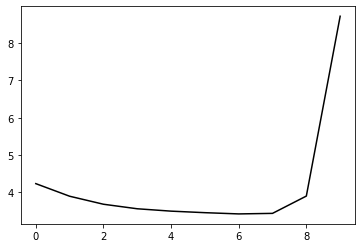

190100 1.0021392257736226
2.976038450695083 0.3622954718822176 -0.10005851189699107 0.08383366501230623
[3.92860964 3.99298706 4.04014179 4.05279504 4.04754463 4.04791243
 4.08284102 4.23645238 4.90287437 8.88466007]


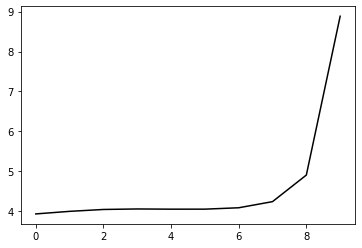

200100 1.0021853714463513
2.9282140112289503 0.3593169940861426 -0.0931985236285002 0.0782141820536348
[3.87589461 3.87414734 3.84122918 3.78179614 3.73960219 3.73451092
 3.78352305 3.94811393 4.59423587 8.86392369]


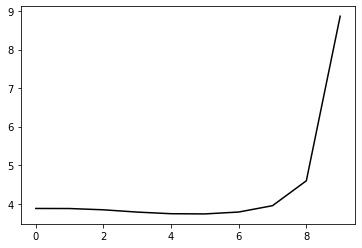

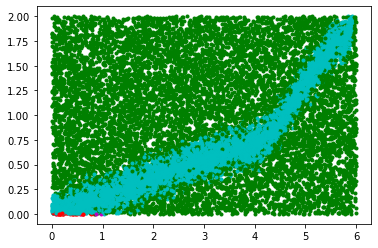

210100 1.0021294095083275
2.8719940846393888 0.3418237539738779 -0.06842942857558841 0.07210186918621009
[3.78351455 3.82239794 3.86806526 3.90857715 3.93463816 3.94457563
 3.9639709  4.08757275 4.72253022 8.88765341]


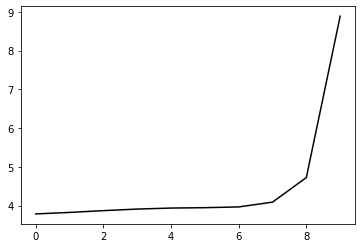

220100 0.9722818847773634
2.7257960541514743 0.33690836916800176 -0.049197662372939766 0.01434660936645257
[3.68285657 3.65779303 3.63390143 3.60461865 3.5634679  3.5032103
 3.4358203  3.4378426  3.93889225 8.76382386]


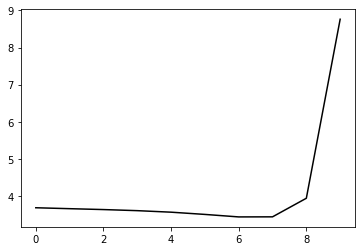

230100 1.0042121819902772
2.554038991122223 0.32123450329071546 -0.0718766918103049 0.03369096544008345
[3.61265496 3.68706872 3.65960939 3.53932005 3.37726386 3.19377418
 2.99963627 2.86464398 3.24654548 8.56806097]


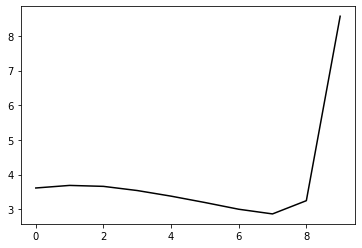

240100 0.968013448308907
2.1809567325282204 0.3101418300314965 -0.08113442000115682 0.020763642798677314
[3.29319678 3.28250286 3.15072743 2.97360314 2.72164565 2.33978178
 1.78931009 1.1321761  1.11280136 8.15061735]


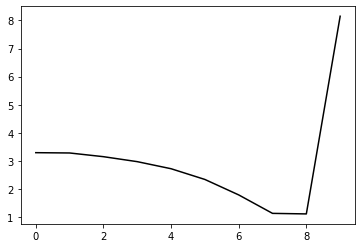

250100 0.9556628959778488
2.0262002423127954 0.2574164764344467 -0.05589605869584476 0.03234927978162945
[ 2.92586702  2.81111386  2.70132306  2.48096015  2.12435759  1.61525312
  0.9057834  -0.02542806 -0.52189406  7.82629204]


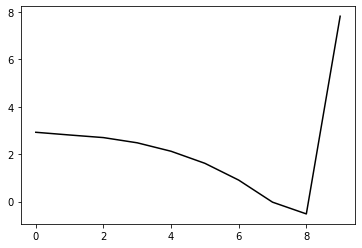

260100 0.5322397353882616
1.7641300790486913 0.23332648669916634 0.06681946404954495 0.03230653766515666
[ 2.28992874  2.29765359  2.21199915  1.87180128  1.24990216  0.36982452
 -0.75476433 -2.06240574 -2.84530103  7.30242421]


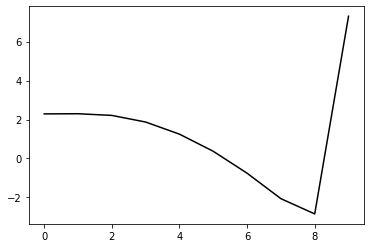

270100 0.325326907289102
1.7554605339825988 -0.15299501698296772 0.08772252616886324 0.03358078158897397
[ 2.16541261  2.07506272  1.9421031   1.71208516  1.31587313  0.6444542
 -0.44453521 -1.94459465 -2.96818611  7.25448763]


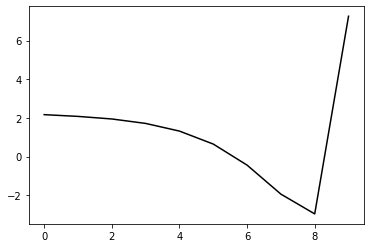

280100 0.36410575751001645
1.715905367808267 -0.47780713340246417 0.09835428255332736 0.036039816166661916
[ 2.15387942  2.04343771  1.87885878  1.63544784  1.25280037  0.63669376
 -0.37263454 -1.92486673 -3.16760423  7.22693672]


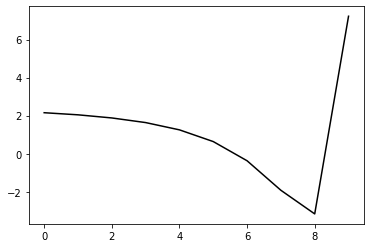

290100 0.46289895036879636
1.6454495602668227 -0.7374835076331425 0.11779831000732693 0.040008930353490256
[ 2.23993191  1.9290991   1.71696932  1.43486946  1.0322604   0.41236132
 -0.59015826 -2.18677071 -3.71199391  7.121159  ]


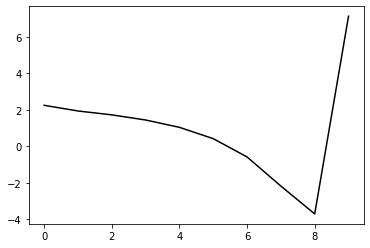

300100 0.1774167083515834
1.51957157522356 -0.9948285094099584 0.16605729559070617 0.054920471310063605
[ 2.33120829  2.18306921  1.92242918  1.59876193  1.17572978  0.57467139
 -0.36381297 -1.88953135 -3.53822952  7.14878436]


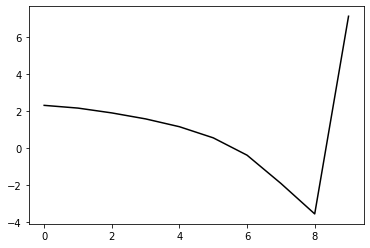

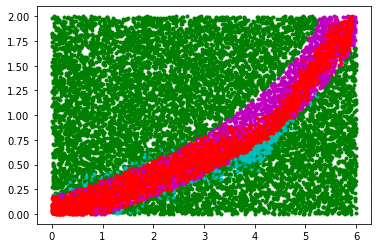

310100 0.3359365419781881
1.4402298204152206 -1.0014705175715308 0.1588722145760809 0.061242593414972527
[ 2.40231898  2.1579216   1.93357564  1.62951907  1.19532991  0.55570548
 -0.42542885 -1.98026465 -3.76597421  7.07229962]


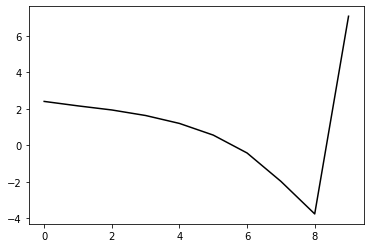

320100 0.2306145289636988
1.3807873741802856 -1.0089165979527934 0.16242115435644888 0.056542030860965486
[ 2.38897488  2.09241576  1.89987135  1.62699543  1.21345378  0.57624431
 -0.42989794 -2.03414173 -3.94705245  7.08026333]


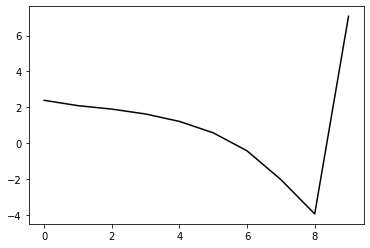

330100 0.25678061592952534
1.3666329921300004 -0.9917063343700888 0.1538753010077802 0.058038254863846894
[ 2.26050661  2.21309124  2.07969733  1.83236998  1.44336667  0.83803523
 -0.13770925 -1.73575871 -3.71860038  7.11395324]


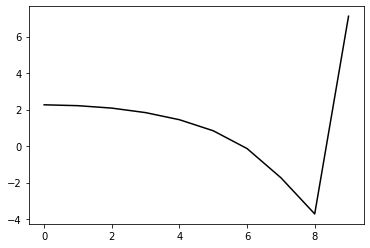

340100 0.21747415778316898
1.3144988537191136 -0.9881734901096381 0.15037305886268748 0.055949320840867935
[ 2.26440344  2.18291244  2.04335328  1.80513259  1.43908184  0.86847192
 -0.06800104 -1.65003506 -3.70780388  7.12060269]


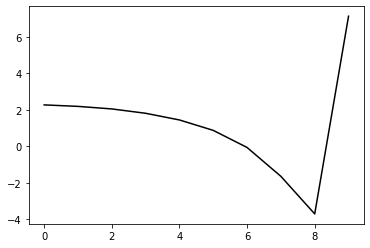

350100 0.32708455065234115
1.2210566045700566 -1.0023504004161978 0.15433189325833385 0.05764615576995398
[ 2.24993457  2.10568085  1.94181133  1.69984018  1.33630492  0.7614844
 -0.19156218 -1.80828311 -3.9658718   7.0595932 ]


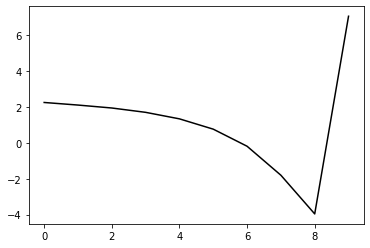

360100 0.23735282788578504
1.1917562100018404 -0.9935592854101979 0.14859919062897856 0.05890271957443182
[ 2.2237375   2.12653908  1.99134413  1.77569042  1.44275043  0.91657365
  0.04101717 -1.47969533 -3.59001363  7.12874173]


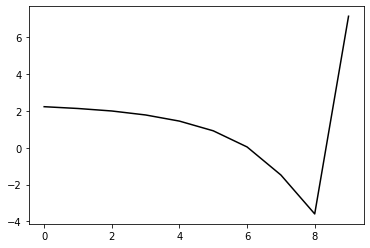

370100 0.37551329640618186
1.1290598416194613 -0.9876665050714458 0.14218530942311697 0.06127235884677748
[ 2.25694197  2.04968936  1.89980849  1.67360671  1.33069951  0.79567258
 -0.08132604 -1.58050521 -3.6481238   7.12578857]


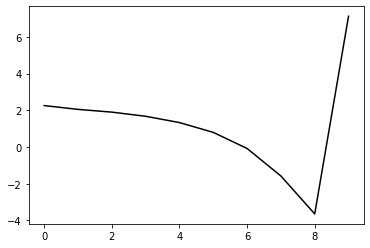

380100 0.20348229338903379
1.1111970527677877 -0.9804960507337257 0.14238977046956194 0.05552055456707408
[ 2.18093739  2.12203513  2.0196309   1.82318939  1.50839171  1.00945206
  0.18320129 -1.24542083 -3.2329708   7.22164196]


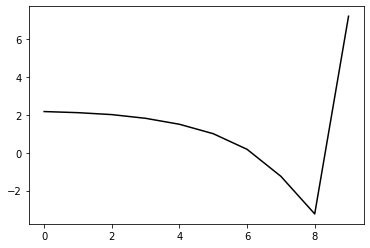

390100 0.15822024263646312
1.051380389900882 -0.978542259439997 0.14000013779661463 0.05297390048055152
[ 2.20791381  2.10174673  1.966968    1.75217857  1.42788491  0.93461518
  0.1348836  -1.24174234 -3.16881191  7.19967658]


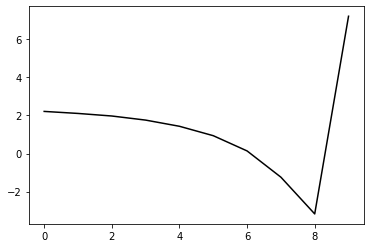

400100 0.21947160030488777
0.9982089550422064 -0.9777433211974377 0.1406946789995416 0.05328785067521499
[ 2.14877688  2.09833044  1.97510052  1.76632972  1.44396068  0.94225
  0.13352411 -1.22777312 -3.09347503  7.22088409]


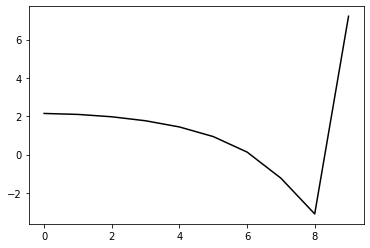

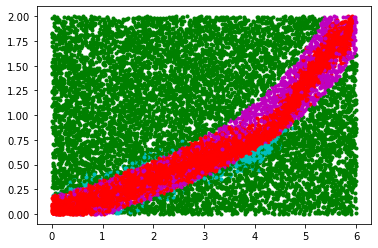

410100 0.18866505480817006
0.9619317868131899 -0.9739011008569802 0.13980870954082336 0.057417377305767944
[ 2.08806686  2.06053331  1.98564631  1.81149294  1.51218638  1.02018779
  0.19931497 -1.19722493 -3.08846224  7.25391716]


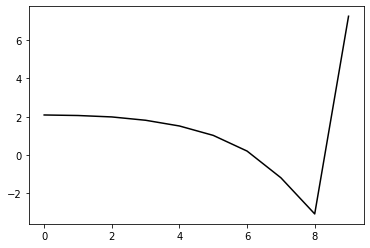

420100 0.32725906541895156
0.9370729971429512 -0.9633282148413909 0.13597555643262624 0.05552017450246677
[ 2.05863586  2.05085981  1.96161185  1.78369317  1.49615637  1.03450854
  0.25675473 -1.09801523 -2.94063864  7.27697068]


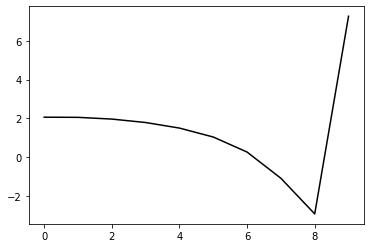

430100 0.2288339583956352
0.8899762963073069 -0.9625863183124205 0.136333005714617 0.055345790709297266
[ 2.06289533  2.05734941  1.97852646  1.80484019  1.52475696  1.08382651
  0.35824429 -0.90936934 -2.67844225  7.34262143]


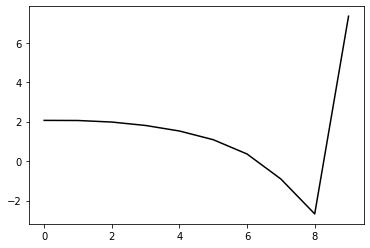

440100 0.1835595768163024
0.857517128989078 -0.9561232711444415 0.13487407803941712 0.05580692773974669
[ 1.99981778  1.99923253  1.90189404  1.72648876  1.44658925  0.9898181
  0.23057847 -1.05341085 -2.77844537  7.32227807]


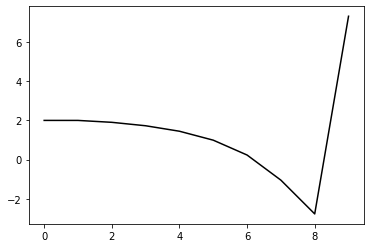

450100 0.24331292202792257
0.8083332554672302 -0.9553774498530674 0.13447201275054899 0.06168603980612507
[ 2.04720145  1.90562405  1.76137638  1.5629363   1.28033317  0.84218664
  0.1169149  -1.12729053 -2.77494787  7.29835308]


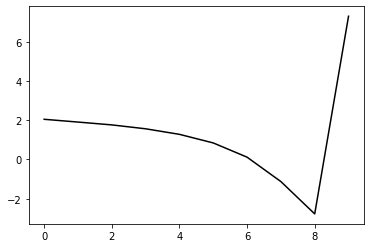

460100 0.2111270532232434
0.796073225667121 -0.9424944172935084 0.13362544938197443 0.05570852700910285
[ 1.98285762  1.94085113  1.85810252  1.69723991  1.43317296  1.01030979
  0.3121905  -0.88397603 -2.47434696  7.37784626]


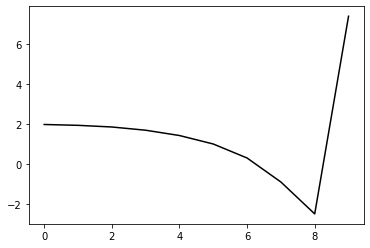

470100 0.21551618173322723
0.7613063296200112 -0.9328569569790875 0.12867004966023168 0.05429732723827525
[ 1.97438508  1.93449674  1.79713225  1.60610191  1.33264613  0.91593931
  0.23622762 -0.91046582 -2.38485534  7.40812075]


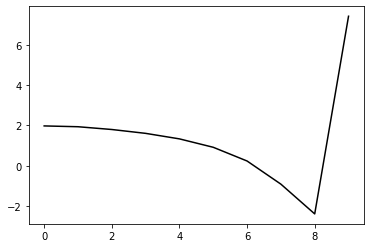

480100 0.166262581621154
0.7411057266002162 -0.9275196001747372 0.13159296150968694 0.05612858927995418
[ 1.91677701  1.87894889  1.75121746  1.58640071  1.3344584   0.92381031
  0.2390664  -0.90007761 -2.29990833  7.42022063]


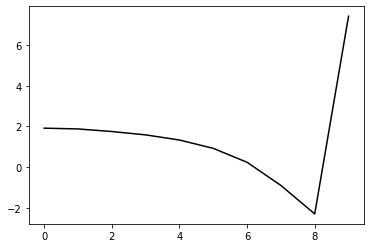

490100 0.28726479456613135
0.7089757940397279 -0.9269582046444952 0.1349509353509211 0.0555036038697715
[ 1.93088157  1.86397456  1.75516596  1.58321276  1.31229517  0.88453529
  0.19988931 -0.91087376 -2.24716454  7.42426068]


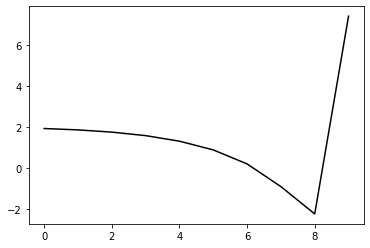

500100 0.2599219328343825
0.6733536098040261 -0.9257443053684804 0.1365716234990394 0.05228793338431614
[ 1.94179686  1.90620356  1.75640824  1.57237899  1.32552551  0.94476654
  0.32151428 -0.72777486 -1.99840724  7.46894257]


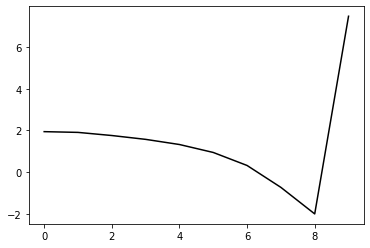

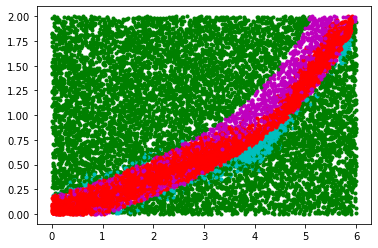

510100 0.267455479121867
0.6561468701271541 -0.9168763019159677 0.13408389636221144 0.05346997001747102
[ 1.93330202  1.83393143  1.70926721  1.51716051  1.24177564  0.82351965
  0.15929191 -0.89097753 -2.09209576  7.4665041 ]


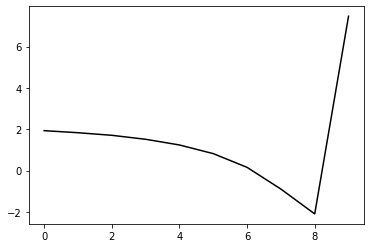

520100 0.28539411760845745
0.6335306398467576 -0.9028771036957497 0.1265141160169025 0.058031950396315146
[ 1.96050418  1.80627433  1.67666891  1.4848508   1.21829827  0.82898792
  0.20803532 -0.79587417 -1.91194013  7.48127673]


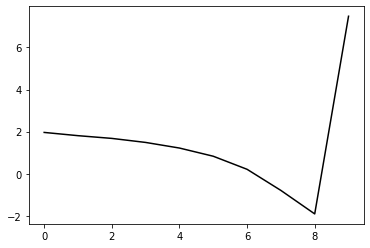

530100 0.21942333315491597
0.6182891993403177 -0.896930658291153 0.1274964664063697 0.055450695222203486
[ 1.84580148  1.87795094  1.76425186  1.56542947  1.28322165  0.86843871
  0.22607428 -0.78132555 -1.87000494  7.53808206]


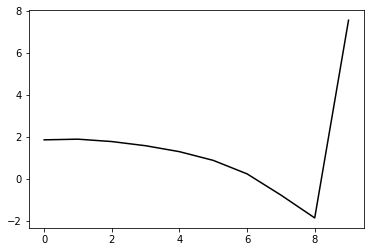

540100 0.26052014112010075
0.5932319552006204 -0.8963681107122747 0.1312401680008488 0.05596875631889718
[ 1.8537706   1.76575481  1.64989491  1.46991105  1.21857642  0.84233497
  0.23631821 -0.73455231 -1.75975933  7.52473549]


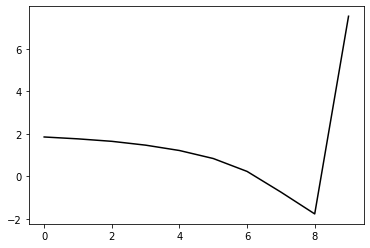

550100 0.21815445873477343
0.5837180672641619 -0.8825504844297167 0.1267860776650268 0.05765489944825723
[ 1.79957155  1.70442863  1.60736722  1.46808791  1.24169722  0.87416573
  0.27743981 -0.6682233  -1.63976667  7.5437841 ]


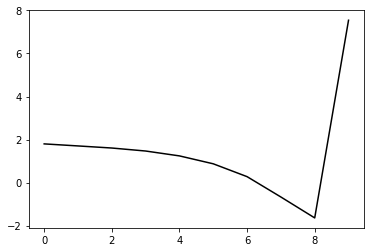

560100 0.16383313629133017
0.5523224997400281 -0.8839234361402207 0.12883845003695585 0.057644146717918204
[ 1.80528244  1.73901608  1.64494798  1.49002925  1.24349629  0.85802141
  0.26682981 -0.64578793 -1.56557876  7.56268954]


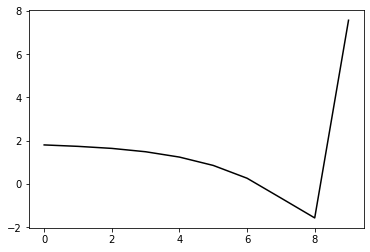

570100 0.27430770800668636
0.5317080399333672 -0.8839424608787332 0.13331215684655828 0.056828436552560715
[ 1.78675691  1.70960645  1.58039978  1.39830639  1.13655988  0.75299792
  0.16501855 -0.75017522 -1.64869082  7.5538601 ]


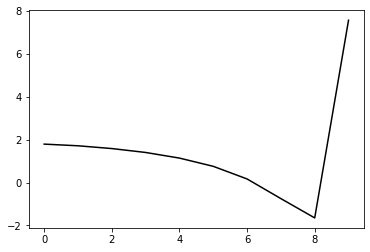

580100 0.23906809757991382
0.5171902258545463 -0.8711132753480794 0.12960058165803015 0.05820400056586463
[ 1.79278375  1.57129677  1.431372    1.26176213  1.01181014  0.63143155
  0.05450482 -0.82021408 -1.65522723  7.56715726]


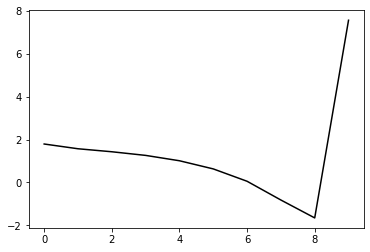

590100 0.2046265469592105
0.5214743320789621 -0.8531748494034797 0.1253179427026628 0.05704203597573646
[ 1.68788596  1.67815831  1.58156926  1.43572928  1.21769164  0.86220297
  0.29695469 -0.57308386 -1.3746518   7.61161414]


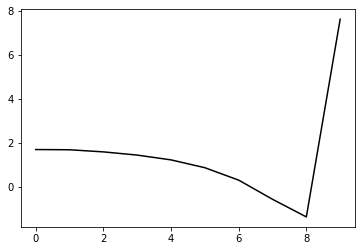

600100 0.22147941883343478
0.48659423041105376 -0.8580301469800916 0.12952465849226633 0.06265810394013607
[ 1.75046503  1.58317326  1.42491108  1.23549667  0.99762848  0.66386809
  0.1447439  -0.66374105 -1.38581091  7.59659829]


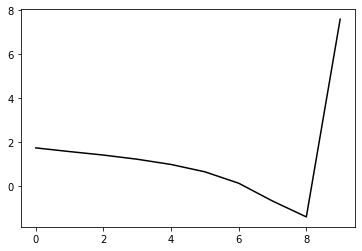

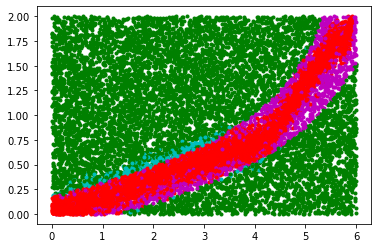

610100 0.17430194764896476
0.4896325955355213 -0.8381574867716644 0.12410148586829277 0.058001996580308815
[ 1.66943522  1.65978584  1.53212185  1.32947589  1.07756574  0.72390337
  0.18229598 -0.62902284 -1.32228473  7.61818325]


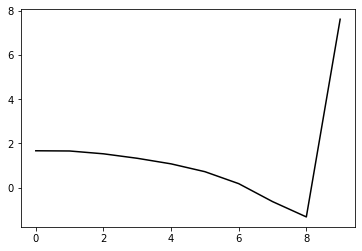

620100 0.1793400479030974
0.4722134768771083 -0.8373365137781767 0.12860779534028036 0.05743791514237035
[ 1.66962625  1.6386987   1.49384606  1.3353939   1.13568895  0.82422794
  0.32440268 -0.44449922 -1.07956211  7.66991172]


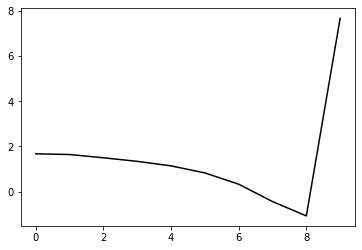

630100 0.16033816578588134
0.46037249890659176 -0.8230637544324033 0.12469686633965876 0.05745259979462647
[ 1.69830307  1.61189616  1.51937763  1.3731015   1.1393293   0.79646657
  0.27548897 -0.49326342 -1.10439156  7.6520638 ]


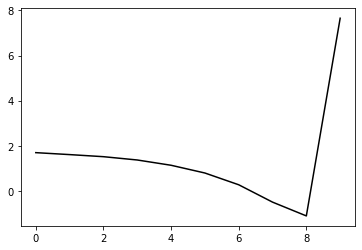

640100 0.19811044159721958
0.45563168896329725 -0.8127131104446311 0.12443628316267594 0.05702339941378365
[ 1.65039396  1.62281949  1.58138102  1.46860533  1.25590976  0.90423382
  0.37071266 -0.39677882 -0.98550368  7.70389681]


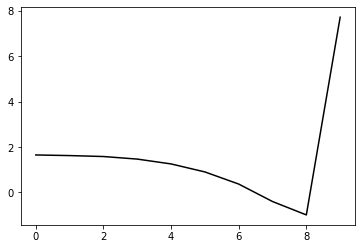

650100 0.19405473777534427
0.4299599557626636 -0.8134583521076898 0.12509560190932054 0.060061173219968504
[ 1.71116069  1.65708103  1.54716719  1.39203536  1.17224702  0.83452642
  0.32992705 -0.3969889  -0.92103744  7.70487379]


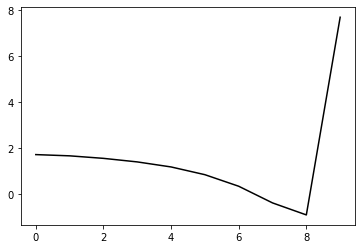

660100 0.22371290935703494
0.4295443276258145 -0.8076894395568771 0.1300701979187355 0.05502346683693038
[ 1.63652365  1.57600424  1.47052945  1.309154    1.1063069   0.79993142
  0.2993081  -0.44749083 -0.97294836  7.70423962]


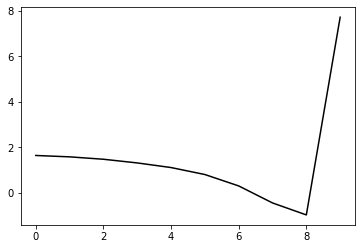

670100 0.2616808092390749
0.4264569345449047 -0.7938323544069589 0.12611116363151462 0.05829309698949059
[ 1.62861214  1.57093189  1.4852654   1.34657028  1.13021677  0.81471551
  0.32972268 -0.39640205 -0.90421669  7.70513353]


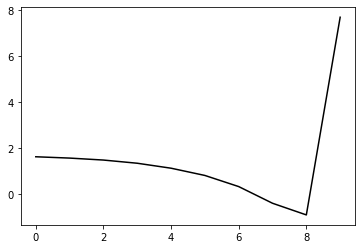

680100 0.22979673381439097
0.4070374795507024 -0.7916336892247232 0.1272236648641917 0.06087309026409004
[ 1.64181454  1.6456665   1.56286967  1.39551398  1.15138569  0.81299954
  0.33705436 -0.33566    -0.78145048  7.73318062]


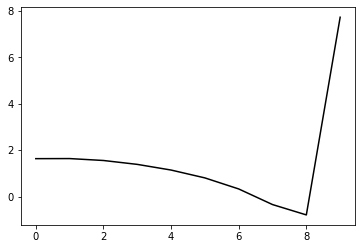

690100 0.22334436849668743
0.4059774588760005 -0.7801898335269434 0.12647928314404794 0.05801369307577677
[ 1.59095985  1.59616925  1.55277489  1.3882794   1.10929321  0.73513553
  0.22861638 -0.45824336 -0.87916263  7.72893717]


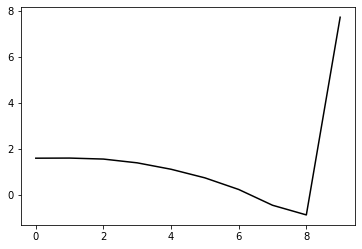

700100 0.17319224029417535
0.3825797967063872 -0.7847693507968573 0.13102992241592717 0.05933993069310084
[ 1.58854124  1.4872999   1.31898331  1.15575152  0.94667208  0.62163361
  0.12609704 -0.56801986 -0.97076461  7.67924835]


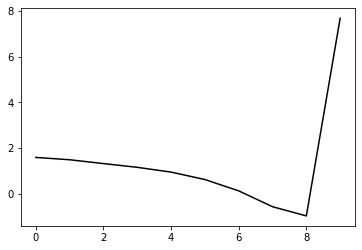

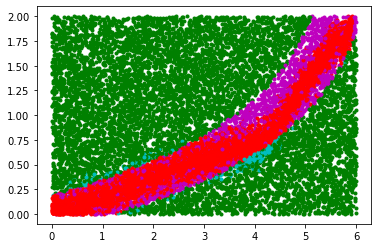

710100 0.3035042548676889
0.38604067043472345 -0.7651328766681248 0.12423204355616553 0.06274608479461542
[ 1.58331717  1.51098094  1.40778146  1.29126324  1.10850016  0.78929882
  0.29599847 -0.4000912  -0.80928543  7.73860031]


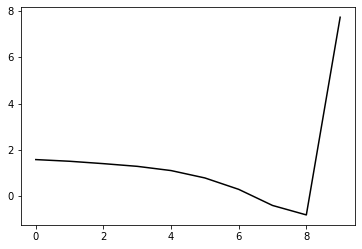

720100 0.17208713686509727
0.3754707840421178 -0.7614338185277931 0.12483273368235655 0.061913569659803276
[ 1.5912335   1.54198163  1.42247505  1.2633821   1.06315346  0.75897045
  0.29210465 -0.37196788 -0.7482539   7.77380835]


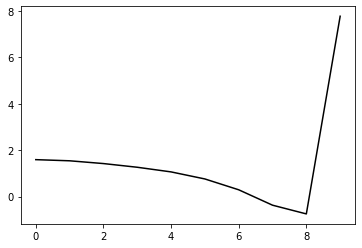

730100 0.2346111751727632
0.37500935886711073 -0.7566338643888199 0.12928857512516873 0.06183041124824305
[ 1.53227553  1.45969735  1.37302589  1.22784796  0.99780414  0.66033768
  0.17471985 -0.49553726 -0.86659912  7.71156346]


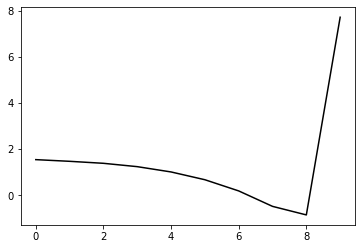

740100 0.16118391215119515
0.36778371492624046 -0.7413787378126406 0.12441968645282354 0.06295717873582178
[ 1.51768599  1.48330934  1.39911035  1.28141706  1.09960414  0.797626
  0.32551853 -0.34578477 -0.71943133  7.75839775]


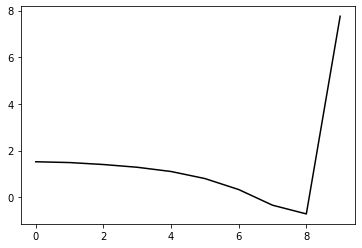

750100 0.15302859424468918
0.36129919174847197 -0.736571265576072 0.12714215792031774 0.06139135883426365
[ 1.4835609   1.45137724  1.37958543  1.26228992  1.06752575  0.76148895
  0.3004849  -0.35892946 -0.73396684  7.75375513]


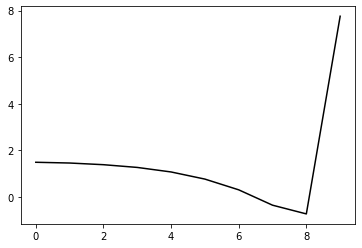

760100 0.2541744224784031
0.34362591098768264 -0.7354350122846793 0.12885250465184026 0.06594521162914685
[ 1.56801127  1.45996329  1.29849711  1.10658153  0.8820806   0.57275275
  0.1128914  -0.52760924 -0.87496423  7.71518068]


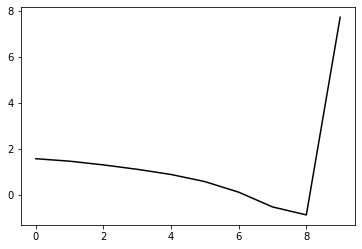

770100 0.22942109375569583
0.3440069537733941 -0.7242684325569378 0.12813136333480998 0.06083122116157144
[ 1.50524808  1.43752348  1.29533467  1.13443862  0.94542934  0.67098937
  0.24306453 -0.38712713 -0.72922186  7.74010332]


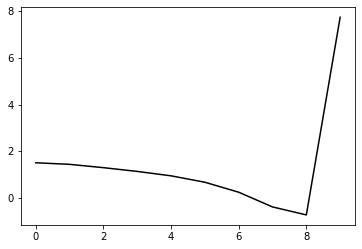

780100 0.22159380414346275
0.33494869961807555 -0.720203567535785 0.1299424381166674 0.06093647310462926
[ 1.52590479  1.40516376  1.31461474  1.1772855   0.99251447  0.70599171
  0.26633126 -0.3433797  -0.65152279  7.72222652]


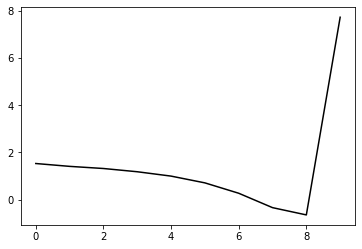

790100 0.24356274347637508
0.3298250378045065 -0.7060969235617279 0.1273836223753875 0.06080265216869808
[ 1.52210713  1.43431287  1.34951971  1.23061792  1.03107703  0.74539616
  0.31788657 -0.28781846 -0.58738481  7.76744755]


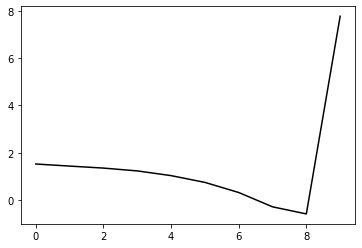

800100 0.2581492252311986
0.32105824427923246 -0.7039655428556703 0.129824334626103 0.060016630392356954
[ 1.52387591  1.39505493  1.21783215  1.03647414  0.80332449  0.49680512
  0.06208204 -0.54694184 -0.83988531  7.73402679]


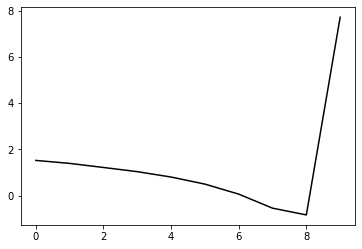

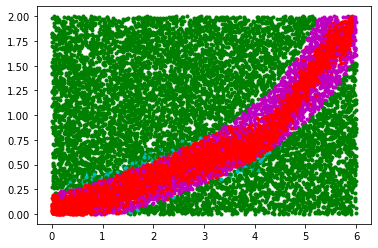

810100 0.2136892588892235
0.3276217002965264 -0.6932792528723906 0.13173650805197357 0.061021868029912496
[ 1.47487719  1.42661705  1.31204299  1.17877728  0.99938825  0.70101496
  0.23851157 -0.40101132 -0.70650891  7.74982259]


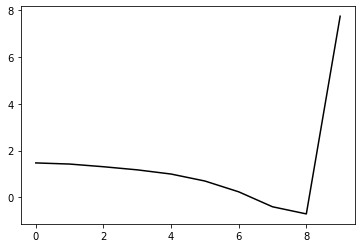

820100 0.25272127974385294
0.31763385744874706 -0.6851477200231205 0.1292419271557517 0.06837242254078403
[ 1.47442158  1.28685404  1.22606468  1.11719896  0.9257673   0.62634598
  0.17001333 -0.49086276 -0.83302979  7.724208  ]


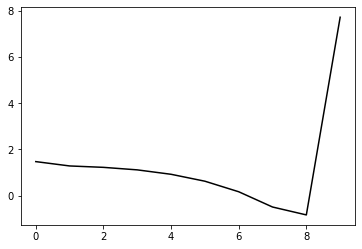

830100 0.19725416253567085
0.3118961160985327 -0.6788766398549654 0.1315724767263236 0.06207146931419274
[ 1.44058978  1.42625259  1.32621939  1.17016988  0.96174809  0.67513442
  0.25575688 -0.34787941 -0.67805815  7.77196255]


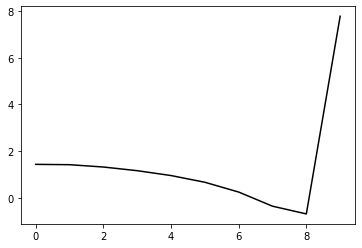

840100 0.15002662400916705
0.3031812009486688 -0.6746782215861282 0.13290196259107948 0.060887952664261606
[ 1.45535479  1.36320294  1.26445008  1.11287365  0.91446618  0.62735636
  0.20536219 -0.38240618 -0.67963649  7.75819721]


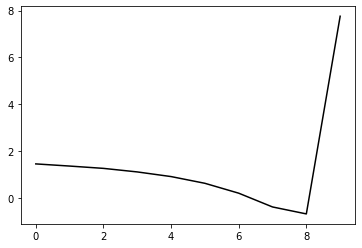

850100 0.22200779372705468
0.304228923728851 -0.6600747725435085 0.13070676636599443 0.06454618353784156
[ 1.41596063  1.36328133  1.2573424   1.1459104   0.98319208  0.71142368
  0.27669267 -0.34051357 -0.64751299  7.78886995]


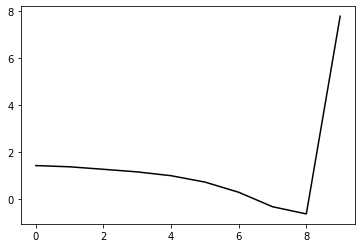

860100 0.2647901411002294
0.2959463282875506 -0.6606959716250445 0.13427022960837817 0.06390041092122728
[ 1.46126335  1.28914656  1.17477663  1.03915442  0.86080186  0.58746142
  0.16208918 -0.43297369 -0.71901634  7.77010904]


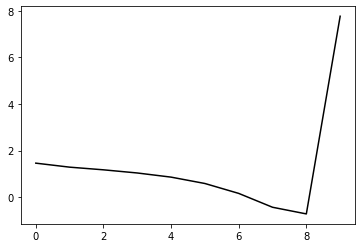

870100 0.17753320396441208
0.29245390792837717 -0.6463321899404055 0.1300208452859921 0.06271967200209692
[ 1.44492326  1.39554594  1.34379942  1.21733182  1.03596424  0.76704551
  0.36114129 -0.20534498 -0.4608366   7.79804499]


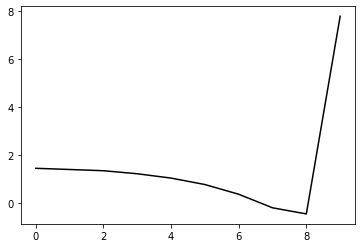

880100 0.21636901806215822
0.28811011938996456 -0.6421033541592847 0.13275802127876446 0.06111571192611338
[ 1.42150287  1.36436444  1.27748982  1.1378663   0.93863886  0.64936666
  0.2295917  -0.33758722 -0.56687682  7.7797232 ]


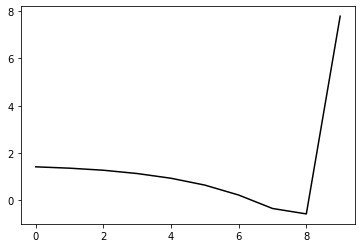

890100 0.2815674908276454
0.2876526325825309 -0.6348541270103699 0.1346070588010535 0.06028711344837599
[ 1.40585924  1.38414976  1.33646541  1.25128758  1.08839101  0.80825922
  0.38571642 -0.18894947 -0.41215628  7.83233719]


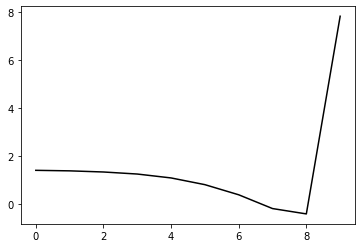

900100 0.2526219151201718
0.2784145300249542 -0.6330573586988928 0.13721815231991014 0.06022375882767346
[ 1.44453922  1.37219745  1.28218935  1.13737587  0.93509382  0.64323052
  0.22118217 -0.35181859 -0.57683221  7.78774826]


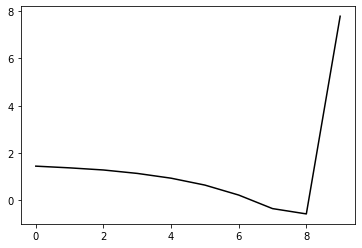

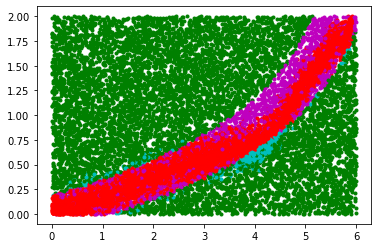

910100 0.24167688766266815
0.275077796169269 -0.6195659493348157 0.1325346736346482 0.06190142812423458
[ 1.41307468  1.36251074  1.28349716  1.1747765   1.01247785  0.749829
  0.34229052 -0.22534948 -0.44377351  7.79528441]


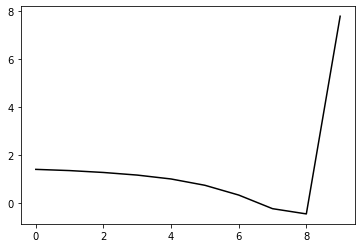

920100 0.27644921743093537
0.26924596681091567 -0.6181655644253965 0.13591083024741663 0.060359877317668086
[ 1.39929839  1.39802023  1.30096484  1.18119894  0.99948285  0.72540333
  0.33129316 -0.20560467 -0.40003994  7.81795879]


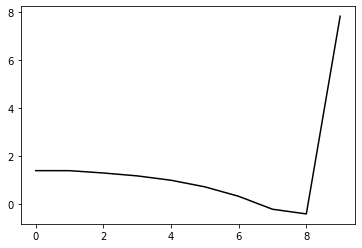

930100 0.21146435469265668
0.2613910465008346 -0.6148550637977461 0.13700553357818632 0.060167635070171706
[ 1.43580761  1.37608637  1.26027228  1.12068062  0.93908853  0.67477522
  0.28222671 -0.2526797  -0.43174626  7.81472236]


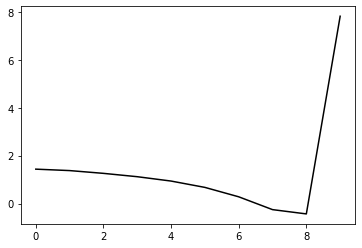

940100 0.1531208859500148
0.27037577278689545 -0.5999995410995057 0.13325273438305638 0.0608710078391589
[ 1.42900078  1.40656011  1.35977214  1.22784838  1.04115775  0.77303098
  0.35902504 -0.20150723 -0.38870024  7.83512265]


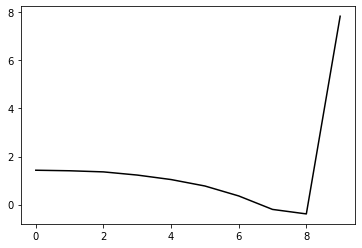

950100 0.20495480674596264
0.2619897596268088 -0.5946642916943433 0.132469684547237 0.06283772695688344
[ 1.45803211  1.3878217   1.31420216  1.17530592  0.97102764  0.68246437
  0.28843031 -0.22363336 -0.36556654  7.81304941]


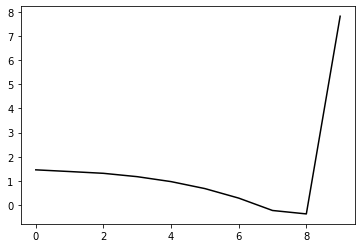

960100 0.1432363131727137
0.26707402053903184 -0.5888120301481067 0.13614443760975076 0.06190516114338165
[ 1.39803666  1.38148395  1.32125851  1.21125804  1.02844232  0.72843982
  0.29723854 -0.24513921 -0.3826566   7.81175027]


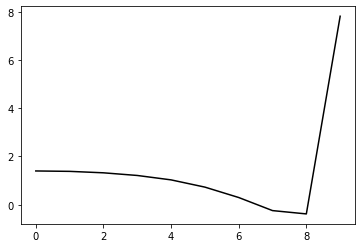

970100 0.25862075436003606
0.2577961694922096 -0.5838593993071391 0.13428467087772508 0.06565324512049799
[ 1.44914557  1.40382087  1.30753039  1.17258309  0.99746175  0.74166757
  0.34713661 -0.19625076 -0.34316116  7.83156107]


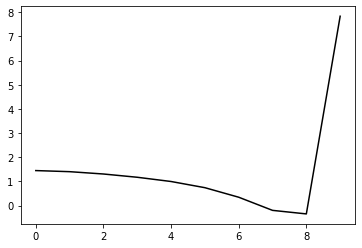

980100 0.292340543395803
0.2470687945138611 -0.5807841542160581 0.13447751576023656 0.06041630906273767
[ 1.508132    1.25730562  1.10992167  0.97662943  0.80202822  0.53740385
  0.13679799 -0.40690807 -0.57331066  7.77998064]


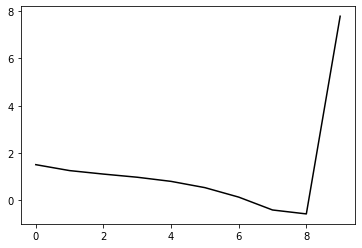

990100 0.2299399471722787
0.2515698877261602 -0.5796139803596332 0.13829100810323078 0.06190735516377233
[ 1.45985569  1.31263303  1.19995451  1.03461184  0.8244843   0.53858283
  0.13800249 -0.39472932 -0.54091959  7.79771662]


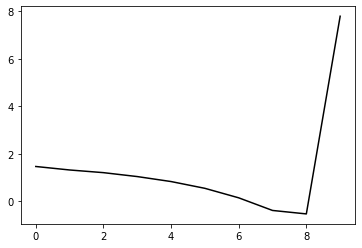

In [70]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for j in range (10000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, m2, lam, alpha, beta, Positive[j%set], Negative[j%set])
        gradients=g.gradient(loss, [h, m2, lam, alpha, beta])
        if np.isnan(loss)==True: break
    for i in range (90):
        optimizer.apply_gradients(zip(gradients, [h]))
        if any(np.isnan(h.numpy()))==True: break
    for i in range (10):
        optimizer.apply_gradients(zip(gradients, [h, m2, lam, alpha, beta]))
        if any(np.isnan(h.numpy()))==True: break
    if j%100==0: 
        print((j+1)*100, Error_func(h, m2, lam, alpha, beta, Positive[np.int32((j/set)%set)], Negative[np.int32((j/set)%set)]).numpy())
        print(m2.numpy(), lam.numpy(), alpha.numpy(), beta.numpy()), print(h.numpy())
        plt.plot(h.numpy(), 'k-'), plt.show()
    if j%1000==0:
        for i in range (set):
            [Positive0[i], Positive1[i]]=NN_func_01(h, m2, lam, alpha, beta, Positive[i])
            [Negative0[i], Negative1[i]]=NN_func_01(h, m2, lam, alpha, beta, Negative[i])
        for i in range (set):
            x_data1[i]=[v[0] for v in Positive0[i]]
            y_data1[i]=[v[1] for v in Positive0[i]]
            x_data2[i]=[v[0] for v in Positive1[i]]
            y_data2[i]=[v[1] for v in Positive1[i]]
            x_data3[i]=[v[0] for v in Negative0[i]]
            y_data3[i]=[v[1] for v in Negative0[i]]
            x_data4[i]=[v[0] for v in Negative1[i]]
            y_data4[i]=[v[1] for v in Negative1[i]]
            plt.plot(x_data4[i], y_data4[i], 'g.')
            plt.plot(x_data2[i], y_data2[i], 'c.')
            plt.plot(x_data1[i], y_data1[i], 'r.')
            plt.plot(x_data3[i], y_data3[i], 'm.')
        plt.show()

0 0.18224287605017053
0.24398135352017336 -0.5749689942710694 0.14186780926843723 0.055910199497011655
[ 1.48393884  1.36680709  1.24716459  1.08803406  0.87095217  0.67651532
  0.26175075 -0.28833921 -0.44122788  7.82987591]


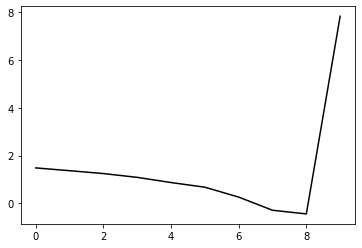

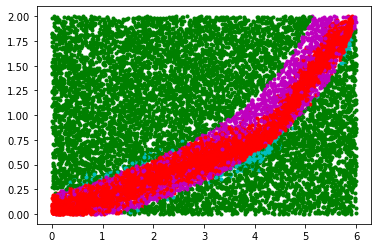

1000 0.19988071629654108
0.26892654374453046 -0.5357881113028564 0.1389288919784901 0.06492282905199223
[ 1.33630866  1.36389561  1.30393964  1.20213843  1.02194478  0.70788731
  0.24521626 -0.35051573 -0.54404861  7.78713004]


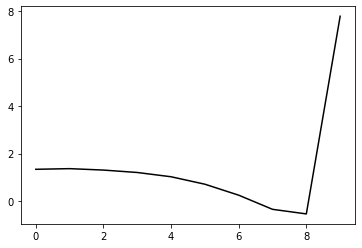

2000 0.19917223484862814
0.2629253484297162 -0.5308068604951295 0.14049023485348014 0.0648663278049589
[ 1.39952333  1.34796241  1.28121903  1.17054608  0.9874773   0.69798408
  0.25615829 -0.35189685 -0.57130417  7.78957906]


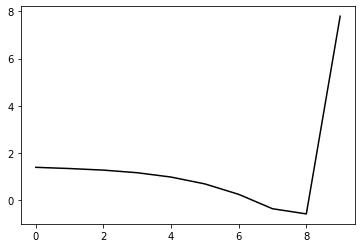

3000 0.22672163486585087
0.25115001825073613 -0.5376374739838833 0.14635512980747853 0.06460514169493024
[ 1.39485417  1.32637772  1.14907336  0.93563704  0.72196583  0.44509024
  0.03573971 -0.5315844  -0.73150749  7.74339994]


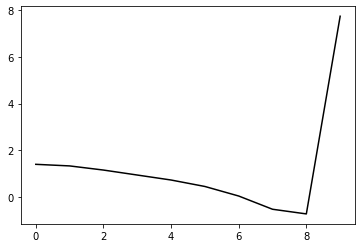

4000 0.20457799782989478
0.24718763052697743 -0.5218640429532517 0.13978784394750166 0.06512253759504828
[ 1.40527292  1.37065997  1.26014029  1.12669569  0.92560616  0.62661668
  0.20897715 -0.34706595 -0.52909831  7.80368169]


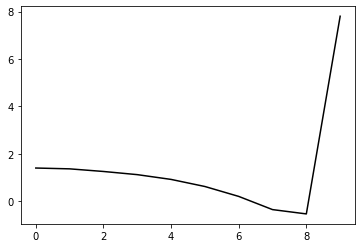

5000 0.18327481933926548
0.254384901187645 -0.5146733597840906 0.14229683446479544 0.06559259625968959
[ 1.37121228  1.35716404  1.28209787  1.14570855  0.94548918  0.64869511
  0.21651595 -0.35481078 -0.54232842  7.79216273]


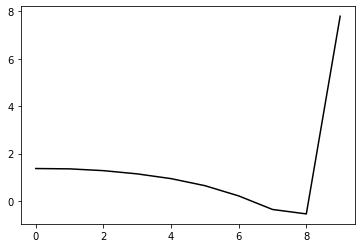

6000 0.1882635848663176
0.24909941811955355 -0.5121247905569585 0.1439516646175108 0.06574010659509658
[ 1.40477677  1.348238    1.28142276  1.16352537  0.97558224  0.68168457
  0.26053699 -0.3029262  -0.48997167  7.82116633]


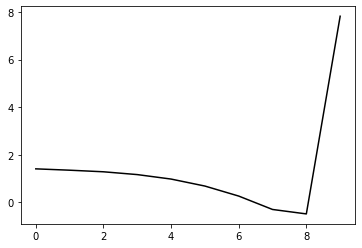

7000 0.25299754890940684
0.2522630055849336 -0.505490797207092 0.14391724739460396 0.06580697050706154
[ 1.37910832  1.35079234  1.28691232  1.1713412   0.97456505  0.68152287
  0.26145461 -0.30546582 -0.49492931  7.80462623]


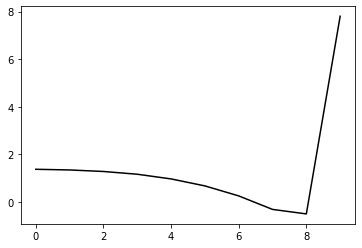

8000 0.24442889442164256
0.24288177575944328 -0.5125857647346459 0.1499611111519023 0.06312553896635296
[ 1.46139454  1.22885996  1.06664916  0.92611719  0.73559099  0.45084717
  0.02578199 -0.53951823 -0.7143299   7.7781311 ]


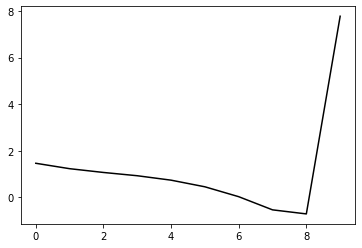

9000 0.2263293288183432
0.23920613211098826 -0.5005128765856581 0.14531725806623377 0.0658276642803371
[ 1.45663447  1.22003836  1.10749128  0.97743763  0.78494103  0.49304076
  0.05430055 -0.53761455 -0.73636615  7.76919458]


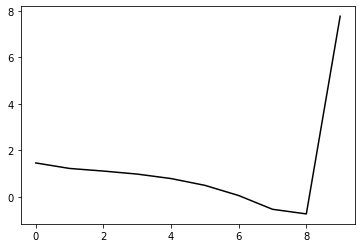

10000 0.22355355632669682
0.23714940570666038 -0.49584406324221497 0.1466777673769897 0.06702245720447217
[ 1.43424851  1.20479877  1.10509144  1.004568    0.83430069  0.55885218
  0.14697293 -0.43033664 -0.63718709  7.77590363]


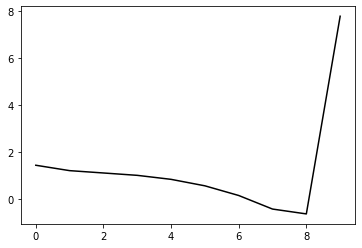

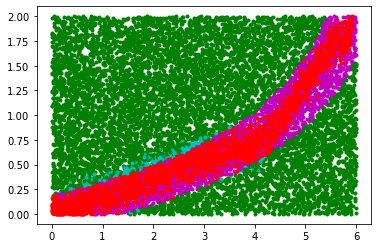

11000 0.23510287511522468
0.23651500856183705 -0.4895668040925655 0.14768076761534002 0.06318041466676554
[ 1.41372137  1.34247826  1.25264874  1.11172211  0.91549565  0.63668775
  0.24094361 -0.29716057 -0.48381669  7.80344777]


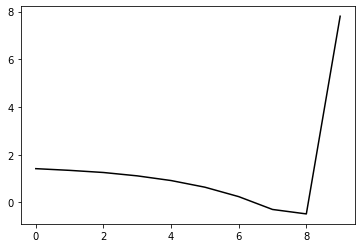

12000 0.2538118679785995
0.23338891543111603 -0.4912716035501049 0.15137589349915798 0.0632562616054747
[ 1.37915941  1.27731159  1.13495307  0.99195877  0.82807128  0.56067671
  0.15722303 -0.37396599 -0.51873135  7.79640366]


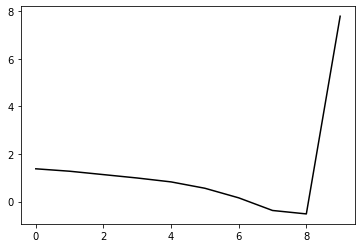

13000 0.18874398725168184
0.23302436106422342 -0.4782943205378091 0.14616364190434408 0.06577965939650687
[ 1.34999646  1.33457388  1.27813615  1.15838708  0.96168801  0.67457814
  0.25821578 -0.30277075 -0.47891412  7.80493906]


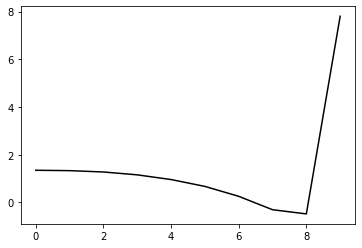

14000 0.27415234471121624
0.235401780759343 -0.47288329854517375 0.1481362362216395 0.06552287402304728
[ 1.33938821  1.34031824  1.26804248  1.12581993  0.92264255  0.63786703
  0.21878995 -0.33905853 -0.50751913  7.79539636]


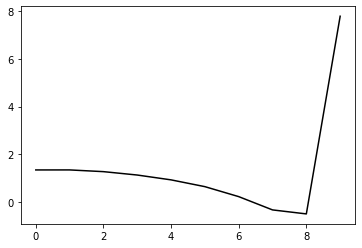

15000 0.1600227532119945
0.22989230370374436 -0.469873566698482 0.14706269616558848 0.06927899411658907
[ 1.36394758  1.35452817  1.25589041  1.11194181  0.9243392   0.64369292
  0.23106417 -0.31848885 -0.46806564  7.81788922]


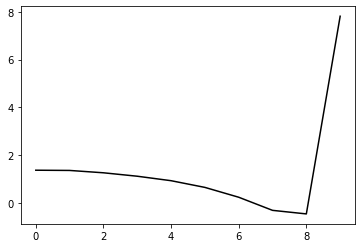

16000 0.22957640143306793
0.22717611090108866 -0.4714749145258004 0.1514373101235451 0.07115734796164003
[ 1.39151249  1.31946381  1.20703033  1.05658186  0.84611398  0.53283955
  0.09594206 -0.46346377 -0.61539987  7.76348092]


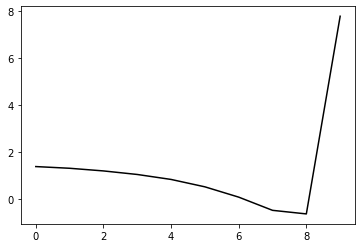

17000 0.33756945564643076
0.22893886411948378 -0.46011382742211043 0.14881377171483687 0.06957079387943794
[ 1.33823228  1.29393619  1.20583334  1.10910477  0.94660861  0.67707172
  0.27117707 -0.28074962 -0.43602382  7.82726914]


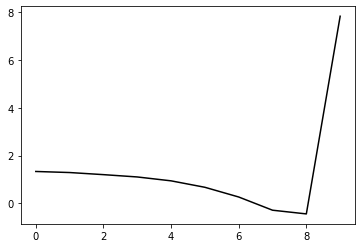

18000 0.2178852163859853
0.22864487412552725 -0.45196598500599455 0.14744142320239254 0.06882212687034
[ 1.35149258  1.36219722  1.29230833  1.15436759  0.95691356  0.6733093
  0.26340724 -0.27426357 -0.41436788  7.80688667]


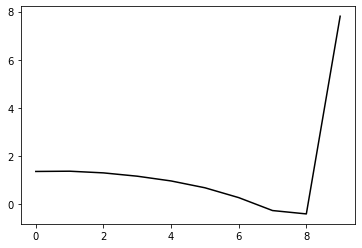

19000 0.39073511857157917
0.23088570058555744 -0.4589860026845663 0.15608018088813125 0.06348726787575183
[ 1.31009177  1.19674709  1.10303188  0.97901921  0.77330978  0.47012081
  0.04432213 -0.50604778 -0.63089511  7.74353244]


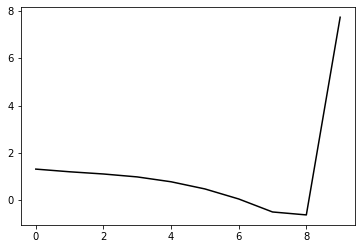

20000 0.13965430311225382
0.2246686484964941 -0.4475234146170994 0.1507547327878685 0.07202530882065372
[ 1.35545974  1.34243637  1.25544787  1.10514359  0.9010374   0.62357566
  0.21910497 -0.33143801 -0.45821784  7.80351471]


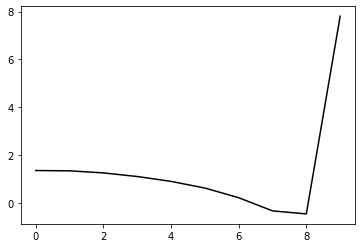

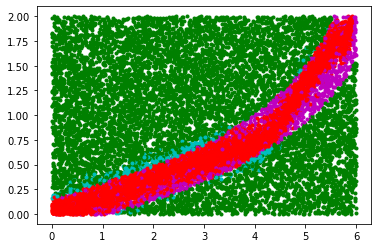

21000 0.20557589920376254
0.22760541252344627 -0.44096130033362885 0.15136124783050012 0.06726532957735079
[ 1.31519769  1.26625427  1.13538275  1.01006561  0.82440893  0.53322266
  0.11555626 -0.43466047 -0.57557624  7.79262543]


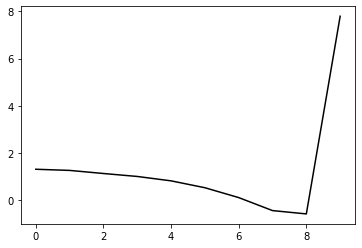

22000 0.19073312670745998
0.22527365975707478 -0.43259977678991657 0.14910825829027266 0.06538148925025314
[ 1.35012308  1.35507364  1.27164178  1.17195687  0.99506876  0.69576602
  0.25927463 -0.30648996 -0.46487959  7.82281456]


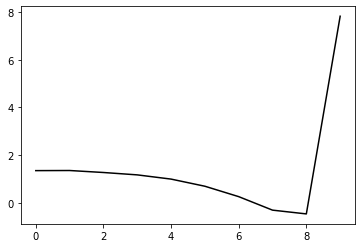

23000 0.2540807858555388
0.22469473080609687 -0.43082916123508086 0.15130490500513047 0.06582265214682557
[ 1.36333184e+00  1.22037464e+00  1.07106867e+00  9.49049962e-01
  7.54655982e-01  4.43338183e-01  3.38400508e-03 -5.64478460e-01
 -7.20856564e-01  7.71782557e+00]


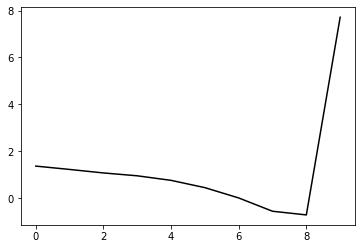

24000 0.24439767878756605
0.22244830310027364 -0.4350959336585698 0.1574625277687388 0.06710998736897315
[ 1.36254537  1.23928421  1.12364256  0.97263363  0.76354648  0.46512536
  0.04871132 -0.5066178  -0.65402754  7.76906335]


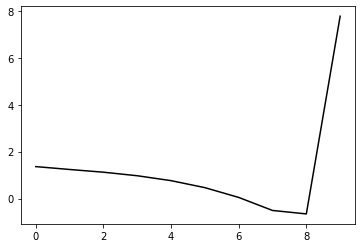

25000 0.2258577368397964
0.21536469145025736 -0.42655666961982514 0.15370247440869353 0.06872528017569537
[ 1.39646942  1.23367906  1.15449229  1.05545095  0.88791539  0.61275291
  0.19855797 -0.35765762 -0.51431888  7.80177045]


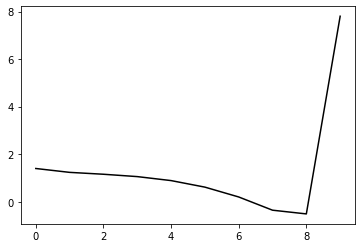

26000 0.18468019884318973
0.20695118970169293 -0.42846304324956513 0.155544151076457 0.06929456699983125
[ 1.42078145e+00  1.19668994e+00  1.07283347e+00  9.24052068e-01
  7.14715485e-01  4.15072167e-01 -1.87645791e-03 -5.48906195e-01
 -6.99838833e-01  7.76976282e+00]


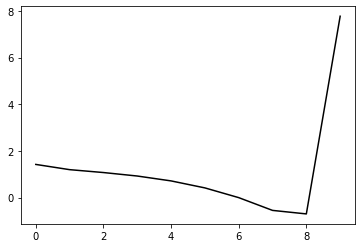

27000 0.19213865721711249
0.20944955157601697 -0.42570738455681323 0.15605294952430857 0.07181481080699659
[ 1.40258191  1.19287511  1.05602675  0.89091166  0.6710606   0.36508725
 -0.0655221  -0.62701241 -0.77401026  7.76431237]


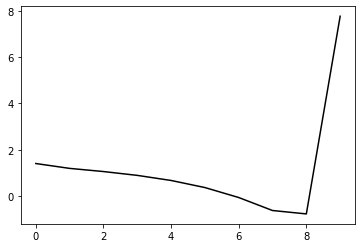

28000 0.2190134235564953
0.20818477143685113 -0.41739316025518264 0.152959315586784 0.07523572426110717
[ 1.37665085  1.24492036  1.0982741   0.95151497  0.77909469  0.52271948
  0.12253159 -0.43906965 -0.59742798  7.77270807]


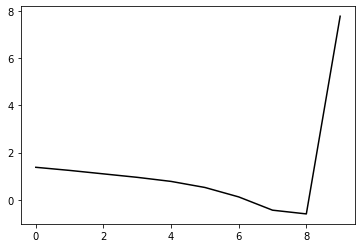

29000 0.18017516635855485
0.2163499948214684 -0.4131211138093786 0.15571320031072117 0.07085490566698266
[ 1.30505524  1.285411    1.22863437  1.10492241  0.90372849  0.6005824
  0.16814197 -0.3930737  -0.55338289  7.77976093]


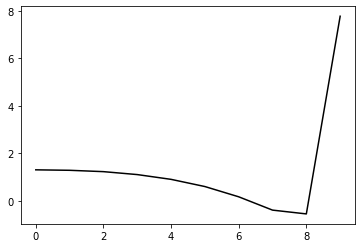

30000 0.16815966994463868
0.20601376128098545 -0.41597300991089414 0.15736806316937055 0.07093438999620778
[ 1.31248824  1.23727711  1.09624141  0.94873825  0.75805358  0.47749903
  0.06992641 -0.47844012 -0.62523796  7.75975191]


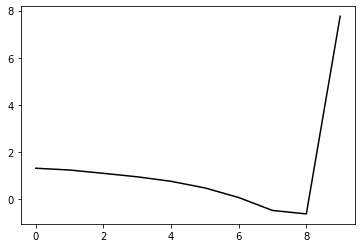

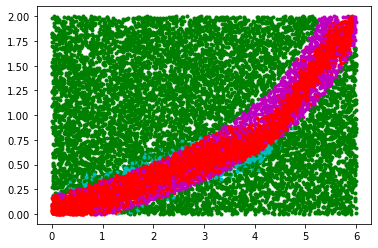

31000 0.26018297737081386
0.20253419377935275 -0.4064151230745518 0.15228423969057156 0.07668187174784875
[ 1.32196926  1.16856373  1.10062005  0.961378    0.75857297  0.48739739
  0.08313356 -0.46937211 -0.61700137  7.76791871]


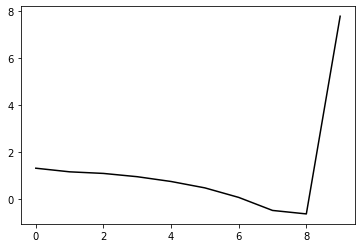

32000 0.2013667343117836
0.20400054227178724 -0.4030106980459795 0.15493752866927998 0.07241093644691453
[ 1.28349903  1.17538769  1.10034736  1.00644767  0.84958846  0.59424353
  0.20372694 -0.33305254 -0.48046696  7.79895013]


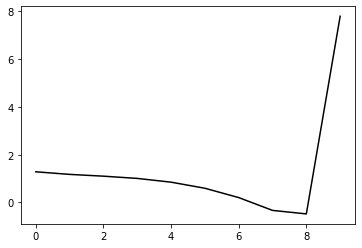

33000 0.23884041999220745
0.18894200806746375 -0.4167408268587361 0.16318673304283332 0.06952689322469308
[ 1.3980516   1.13851941  0.94083043  0.78027184  0.60310387  0.329414
 -0.0646776  -0.55922486 -0.65057946  7.78979406]


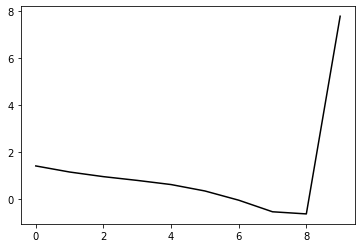

34000 0.22664538239905502
0.1991171469567101 -0.4047951671193647 0.1616754284846769 0.06949663735537231
[ 1.30719813  1.25356329  1.14401443  0.98866806  0.76428352  0.45997593
  0.05014136 -0.47201565 -0.56023357  7.77744021]


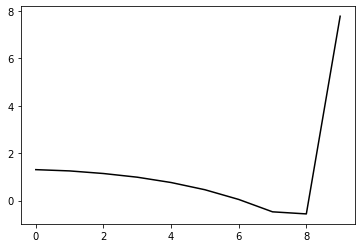

35000 0.291971516200501
0.20045899246040635 -0.3934629936879904 0.15715457270956062 0.06921042206671774
[ 1.31259097  1.23524695  1.09834333  0.96664944  0.78456481  0.50589349
  0.09930076 -0.43821044 -0.54705605  7.8016019 ]


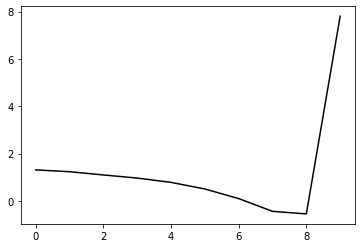

36000 0.21511297993510756
0.20272526479301223 -0.3948328212724559 0.1604254827581115 0.07076845635221836
[ 1.33159863  1.25646925  1.13672344  1.00126222  0.82145565  0.5328803
  0.10961809 -0.43209789 -0.53401212  7.78255219]


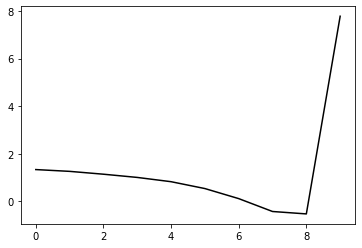

37000 0.16884989190473151
0.20791023242582554 -0.38874921928175293 0.15953266352935333 0.07194169582678338
[ 1.31647272  1.24179006  1.17200319  1.04712385  0.84674107  0.57015822
  0.16376498 -0.38442433 -0.49719188  7.80576989]


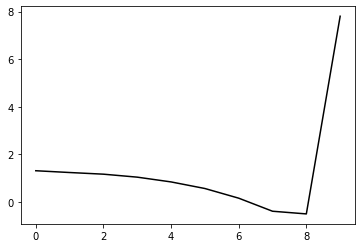

38000 0.18094409807801623
0.20287299044237866 -0.3853396953062414 0.15895587011402568 0.06828281127460686
[ 1.34864305  1.24713287  1.08990046  0.941174    0.75844871  0.49506741
  0.09560288 -0.43906795 -0.55311666  7.78102852]


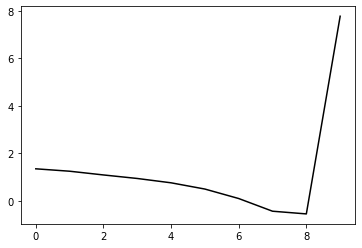

39000 0.1711767446470581
0.20722295762423434 -0.3809297361822789 0.1594349722995642 0.06817837655363396
[ 1.32569741  1.30200348  1.18011646  1.01086855  0.79801463  0.49542847
  0.07406303 -0.46271716 -0.57063087  7.77588057]


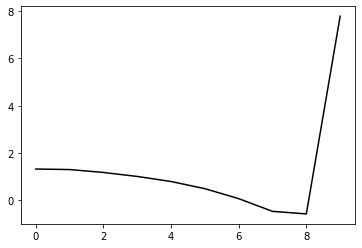

40000 0.20503917154598908
0.21173784336692214 -0.3766702229986129 0.1603952083734224 0.06960846778909302
[ 1.33292103  1.30433949  1.24712524  1.12062646  0.90221379  0.58793108
  0.15275396 -0.40221099 -0.51891922  7.79995185]


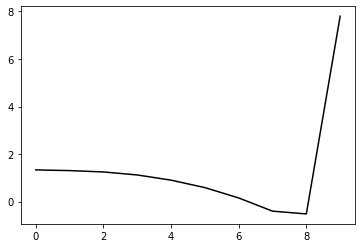

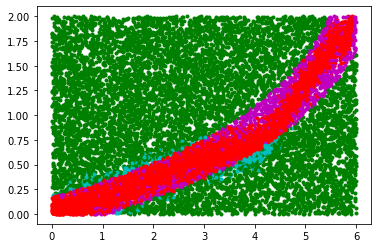

41000 0.18683742485385244
0.2127308318661474 -0.3706321612348376 0.15847358218349553 0.07111968513880305
[ 1.34199999  1.37745953  1.31670058  1.15161146  0.89672175  0.55740661
  0.10555914 -0.46884177 -0.6081405   7.80753883]


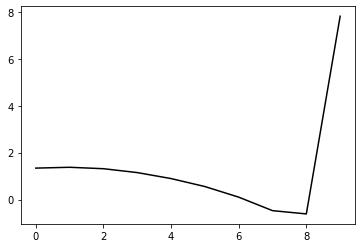

42000 0.29250750755369265
0.20922023103383128 -0.37357150401894024 0.1623095714740239 0.06790771362970494
[ 1.40475991  1.21760615  1.08771281  0.92443632  0.69800569  0.37720298
 -0.0643242  -0.64076701 -0.78442864  7.74276695]


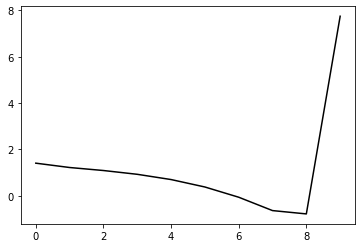

43000 0.18952996323188576
0.2090156144434254 -0.36897499482884305 0.16258519310498218 0.06954507944990386
[ 1.36491878  1.28563726  1.17623938  1.05337526  0.87079258  0.59578261
  0.18624145 -0.37204764 -0.50889044  7.79384467]


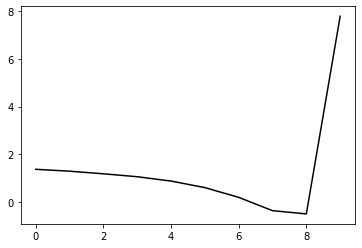

44000 0.16208911543271254
0.21416920334633816 -0.3634258853642472 0.1625516914584336 0.06995135684791684
[ 1.33421542  1.33786884  1.26540379  1.09242695  0.85616573  0.54364869
  0.10520067 -0.4617463  -0.61659792  7.77658779]


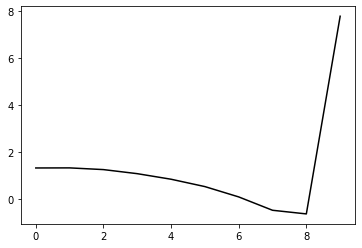

45000 0.2076112651262116
0.2074255962655183 -0.3605401038839285 0.16225920174378247 0.07147565512285244
[ 1.38956173  1.34606237  1.21818437  1.08965622  0.9124776   0.62138244
  0.18599113 -0.3871698  -0.53684284  7.75135737]


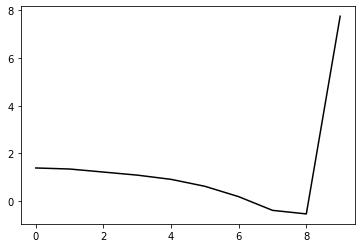

46000 0.4019720376776113
0.20438761415890197 -0.35810164200871974 0.16139131501202064 0.07658290855416285
[ 1.42113625  1.28886281  1.17081254  1.03684666  0.83005227  0.5205884
  0.08515668 -0.48220009 -0.62461206  7.75675991]


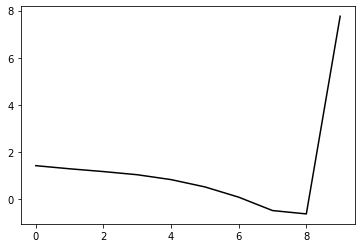

47000 0.19945647998325727
0.2109919165291807 -0.35913276239034125 0.16672656150058396 0.07186338896663565
[ 1.34135446  1.28920656  1.19175919  1.04267052  0.84297759  0.55435136
  0.12607231 -0.44634771 -0.58889231  7.74594069]


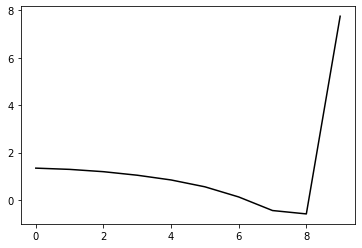

48000 0.1326410606002359
0.20746170601142813 -0.3556487201498147 0.16623165640892376 0.0705896319292051
[ 1.35225491  1.28981086  1.18364373  1.04749258  0.8762185   0.60725713
  0.17954352 -0.39934996 -0.55809897  7.77354349]


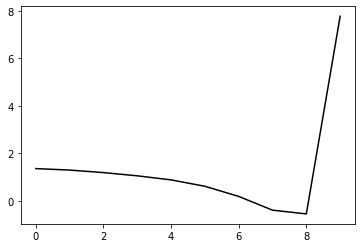

49000 0.27009469653489265
0.20367329930914377 -0.3598770601624448 0.17003272547378387 0.06896745516869221
[ 1.36305878  1.2294537   1.05895254  0.87696863  0.67901273  0.38760732
 -0.05305318 -0.63508863 -0.80477165  7.74993198]


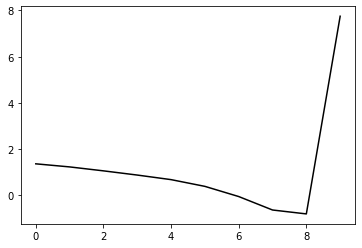

50000 0.19893561938120918
0.20336029000015965 -0.35168707840641944 0.1672508835227577 0.0730651968531338
[ 1.40005737  1.30755236  1.17160495  0.99704656  0.78449037  0.48473286
  0.04595342 -0.54030874 -0.7166041   7.73813108]


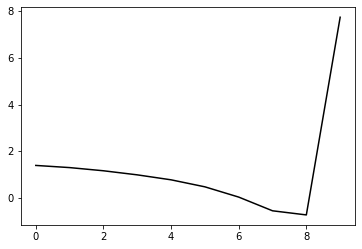

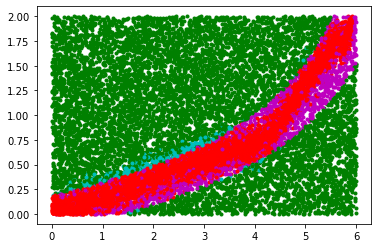

51000 0.225477523128417
0.20963791400681903 -0.3428585826091168 0.16668997170654945 0.06940891650187091
[ 1.33624634  1.327323    1.26255883  1.11530326  0.8926266   0.58618742
  0.1522178  -0.42822925 -0.60724153  7.77658349]


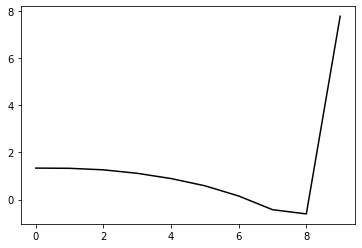

52000 0.1683848148424893
0.20110953201490273 -0.34206429440599184 0.16607413415169156 0.07182414204153935
[ 1.37219687  1.27908752  1.13862103  0.99489801  0.79655451  0.48546122
  0.0323863  -0.55362401 -0.72289776  7.78340312]


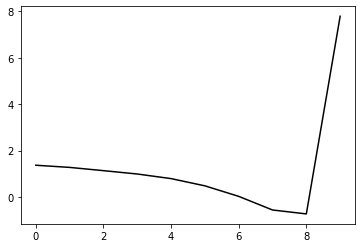

53000 0.21243319125569077
0.20082423848867859 -0.34490303176596876 0.17077506530229786 0.07088000274544486
[ 1.34590923  1.3523946   1.24388744  1.07957071  0.86649774  0.56864957
  0.13740931 -0.44110504 -0.60482315  7.78170098]


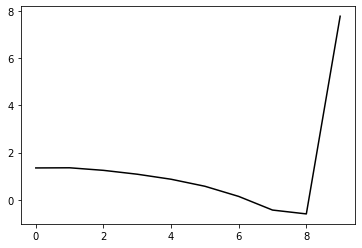

54000 0.27481386432044114
0.19576610968264727 -0.34236648226209765 0.16916780332330728 0.0710719260620126
[ 1.38569112  1.23225593  1.06555897  0.90361415  0.67899965  0.36010663
 -0.08736965 -0.677402   -0.85470939  7.73126652]


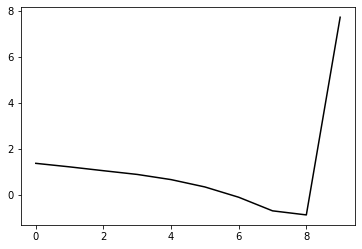

55000 0.2061652026051583
0.20096723083765708 -0.3323183351941281 0.16683167133447185 0.06915977642217243
[ 1.35141475  1.28475013  1.17429231  1.04924668  0.87717059  0.6089481
  0.17717187 -0.41885509 -0.60677624  7.7730124 ]


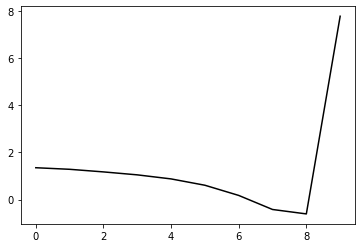

56000 0.15158206088998577
0.20157332125527946 -0.33166927740818813 0.1682372152094394 0.0693075810292565
[ 1.341067    1.29273642  1.16613543  1.02911758  0.83008588  0.52104028
  0.08339391 -0.48993477 -0.66621769  7.76801888]


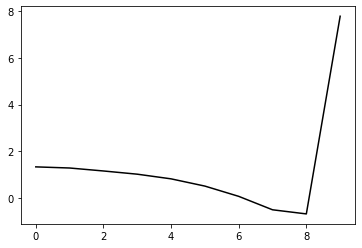

57000 0.26703436158571814
0.20139858364805704 -0.3329695572444877 0.17120340100644735 0.0682021823798254
[ 1.34869479  1.3076724   1.16827998  0.98584589  0.77047227  0.46150952
  0.02280615 -0.54620351 -0.69400074  7.74732628]


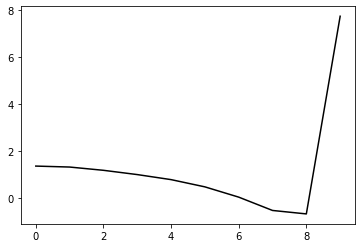

58000 0.22076403435706
0.2042365244124976 -0.3294735427849018 0.1716134069124373 0.07055192521703821
[ 1.37198398  1.26871443  1.16165801  1.0138688   0.81567768  0.51232268
  0.05671922 -0.53346936 -0.68403387  7.75485115]


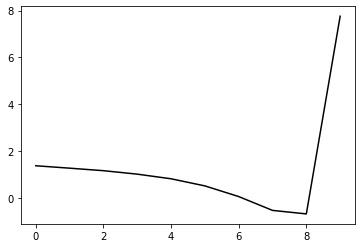

59000 0.18001011720584584
0.2067558114536779 -0.32564457038001826 0.17101305802316777 0.07317721996168478
[ 1.33819335  1.27659358  1.20445963  1.07486087  0.85520083  0.54063449
  0.0894087  -0.51751499 -0.69729014  7.74910508]


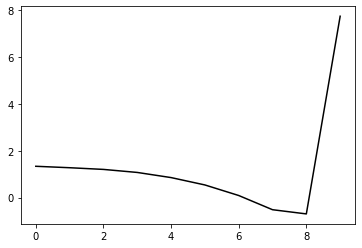

60000 0.17097145168704486
0.20486624093024694 -0.32591404219764625 0.17290274397349284 0.06930813970206474
[ 1.33457173  1.29053499  1.16686713  1.02974438  0.8424958   0.56436272
  0.13627449 -0.4558198  -0.64226339  7.77798773]


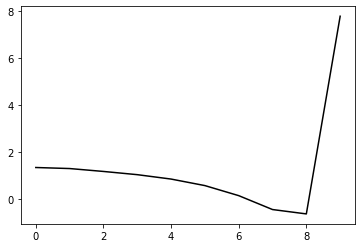

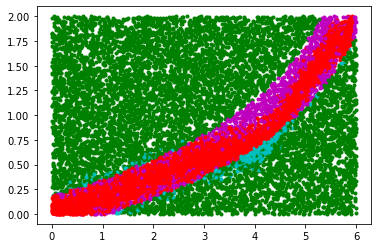

61000 0.16533368581095428
0.2037657607956144 -0.323782123243716 0.17363741978154837 0.06941674215135489
[ 1.35772788  1.30778336  1.19233803  1.04732027  0.85052865  0.55355278
  0.11422717 -0.47159878 -0.65625482  7.75490473]


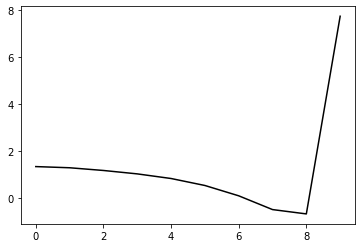

62000 0.15079371984291257
0.19812163007555392 -0.32433791860080097 0.17429610131051554 0.07059871086772583
[ 1.35787595  1.29797019  1.15720584  0.9775473   0.73888571  0.42109761
 -0.01264835 -0.58475376 -0.75615495  7.74173054]


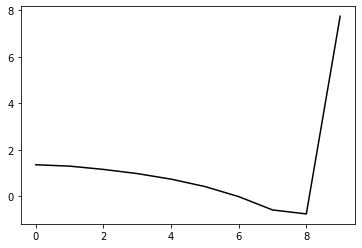

63000 0.17094853812127114
0.19424997614021886 -0.32516888822919165 0.1739019367026718 0.07277672032336473
[ 1.40597223  1.21166759  1.07163586  0.91127465  0.69606109  0.37846567
 -0.08520172 -0.6932226  -0.88118754  7.7441862 ]


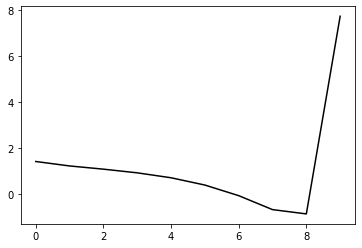

64000 0.20765851175136774
0.19851356610821105 -0.32395024520465565 0.17645699522174826 0.07022040773076274
[ 1.32733902e+00  1.21035303e+00  1.09336967e+00  9.62525867e-01
  7.62821969e-01  4.53324935e-01  9.55972716e-04 -6.00484729e-01
 -7.80710174e-01  7.73831320e+00]


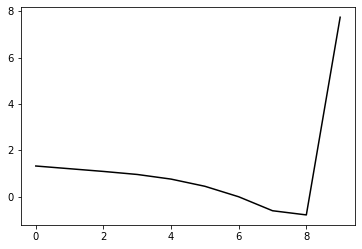

65000 0.21208349090178172
0.19400280655613908 -0.3205908685724243 0.17468055369321817 0.07245955602468385
[ 1.3218688   1.28290918  1.18457625  1.05357337  0.85524086  0.56188246
  0.1299034  -0.45773669 -0.6365409   7.76134521]


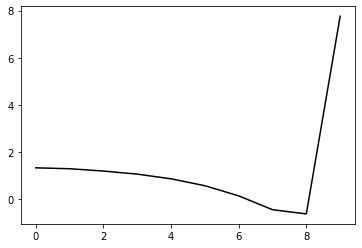

66000 0.16847158203414367
0.19506929291445482 -0.3166645190303218 0.17410369862543723 0.07275450917534033
[ 1.31823793  1.28677355  1.19077857  1.03459748  0.81931195  0.508424
  0.05882965 -0.53475566 -0.71716551  7.74504559]


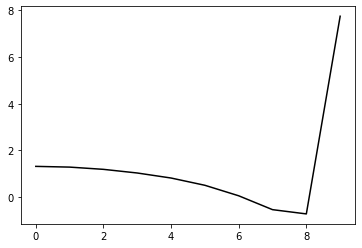

67000 0.285234907048409
0.18361270736353544 -0.316536218629059 0.17300462551237605 0.07208694127472143
[ 1.39248817  1.15119934  1.00715141  0.83433865  0.60424936  0.29411919
 -0.14445999 -0.72480739 -0.90102929  7.7196579 ]


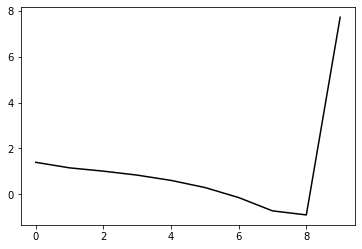

68000 0.2143779814710845
0.19224183881619816 -0.3134011010533914 0.17494339358310976 0.07483252700045973
[ 1.3092578   1.31649584  1.20072628  1.01782413  0.7918947   0.48398314
  0.03906167 -0.55135884 -0.72374944  7.77150679]


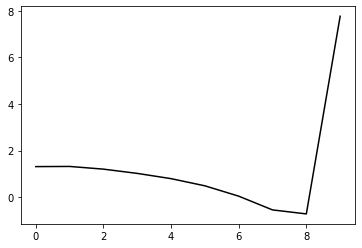

69000 0.21213222375867652
0.19147040863734052 -0.30985032199829443 0.1750757079039971 0.07114311016609912
[ 1.3391239   1.25009261  1.13642486  0.96890143  0.77144633  0.49070942
  0.06688216 -0.51384418 -0.68970515  7.75859646]


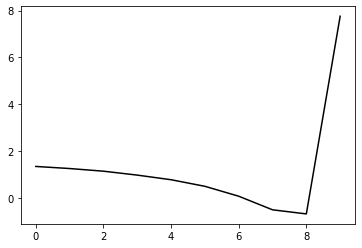

70000 0.16771707913951925
0.1884201682485178 -0.3089015030574223 0.1752703267728356 0.07011684793132714
[ 1.30853827  1.21307922  1.06920314  0.91695268  0.71797593  0.42214741
 -0.01236648 -0.59100645 -0.75832962  7.73062295]


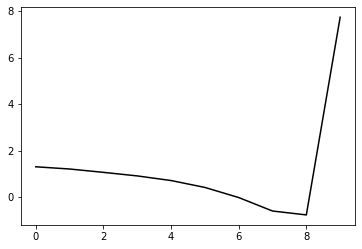

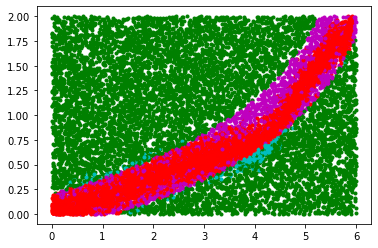

71000 0.3091299998671546
0.1881985955849909 -0.30214606562464136 0.17190349512144226 0.07273565677563704
[ 1.32695114  1.31946746  1.2390322   1.10190398  0.89013851  0.58841565
  0.15333283 -0.42482801 -0.58526466  7.78427896]


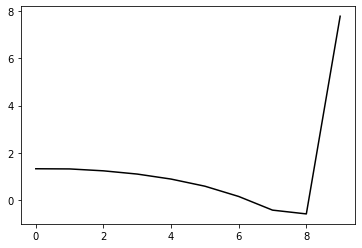

72000 0.1688837391431038
0.1880649762733114 -0.3085308999484696 0.17748989661335454 0.07227644700009485
[ 1.32522244  1.25982977  1.13785854  0.98551716  0.78390513  0.48814069
  0.04843626 -0.54547984 -0.72220475  7.74677389]


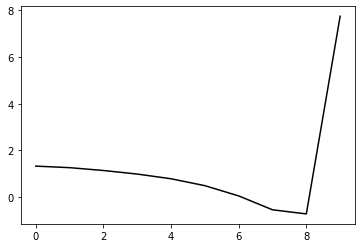

73000 0.20009595020294943
0.18873468722503567 -0.30378459805489433 0.17554529226040474 0.07402070718056382
[ 1.32698956  1.2804224   1.17374886  1.00983083  0.79059499  0.4815658
  0.04030831 -0.54798467 -0.72817359  7.73545204]


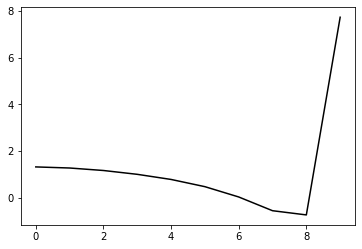

74000 0.13546670644158057
0.1903360582541445 -0.30124355034571404 0.17502156718171444 0.07342068741190025
[ 1.30296793  1.29232565  1.15645707  0.95628524  0.7216422   0.40874212
 -0.03741643 -0.63289164 -0.81379886  7.73231984]


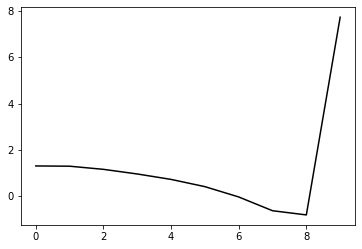

75000 0.13739471237678375
0.19079939137045093 -0.29710619982610603 0.1756939684757446 0.07255464393789472
[ 1.30405715  1.2616896   1.1800471   1.05099329  0.85614939  0.56975661
  0.1415657  -0.44332668 -0.62772957  7.78275023]


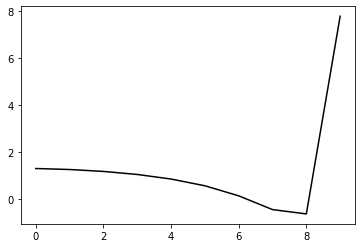

76000 0.22186981332700453
0.19116461807737495 -0.2979146246057994 0.1766202880250752 0.07458839657819602
[ 1.3092651   1.25692709  1.18691064  1.05462267  0.82842395  0.50239693
  0.05404138 -0.52316494 -0.68745833  7.76801054]


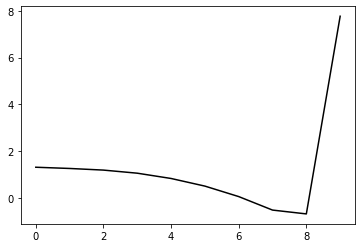

77000 0.2461850822153819
0.18398054593956173 -0.30136624408764573 0.17810075442893544 0.07771911626704411
[ 1.37065104  1.24347599  1.106843    0.95487721  0.76711116  0.4889329
  0.06394799 -0.51286313 -0.66303195  7.74641995]


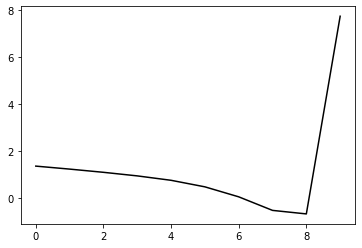

78000 0.22094914865465992
0.18988557927203437 -0.29691049784948015 0.17809292837789364 0.07345951842707707
[ 1.30453693  1.21746454  1.08470333  0.94239936  0.73856188  0.41684639
 -0.05333032 -0.66081539 -0.83238712  7.72349988]


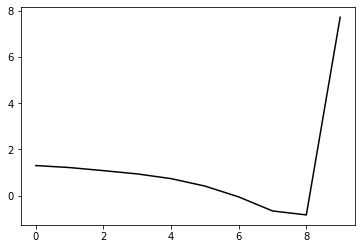

79000 0.29173677737553105
0.18530680743510483 -0.2975448698443916 0.17793087934247792 0.07859082276793349
[ 1.34612756  1.27707451  1.15974455  1.00921375  0.81878227  0.5361215
  0.10179801 -0.48890518 -0.64445689  7.75822482]


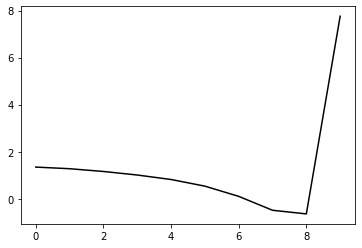

80000 0.2358389290888909
0.18668631058642027 -0.2963713655025815 0.17849805118048215 0.0731879522595078
[ 1.38600339e+00  1.26189011e+00  1.14242788e+00  9.72664726e-01
  7.48027260e-01  4.39477509e-01 -1.90024950e-03 -5.88082084e-01
 -7.55657751e-01  7.76842958e+00]


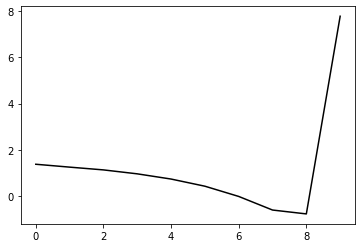

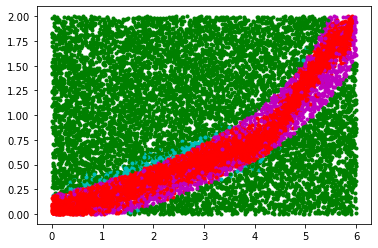

81000 0.21394383295140676
0.1898137446624024 -0.2890863816502455 0.176470259999855 0.0715478649142698
[ 1.30074152  1.26936254  1.19133307  1.0666387   0.87525485  0.5757666
  0.13457474 -0.4432429  -0.59936986  7.77355312]


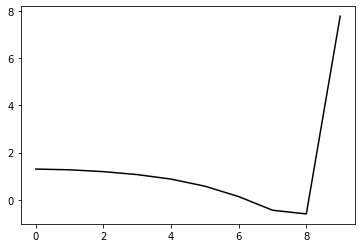

82000 0.4536790384203248
0.18112816399102996 -0.2872911843997022 0.17337301374772512 0.07863091428257797
[ 1.40333666  1.28669363  1.18061097  1.02474138  0.81165399  0.50290234
  0.05186987 -0.53677053 -0.69621513  7.74171431]


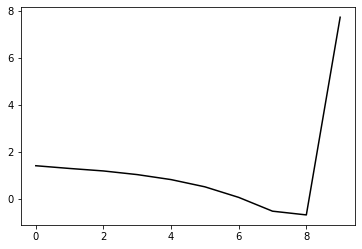

83000 0.20938355408390935
0.18232858336907348 -0.2889012018870071 0.17662917156304553 0.07722133564914047
[ 1.37406891  1.30110841  1.19447967  1.02627157  0.79239525  0.47025224
  0.02013972 -0.56510583 -0.71943035  7.73639742]


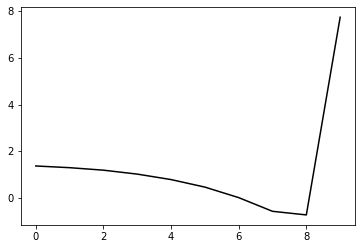

84000 0.15097555316635874
0.1910618028379509 -0.2859509821723654 0.1787672339583101 0.07193546819718466
[ 1.31915227  1.30660651  1.23079436  1.08263578  0.86771205  0.5505606
  0.08790696 -0.52194371 -0.69897519  7.74857659]


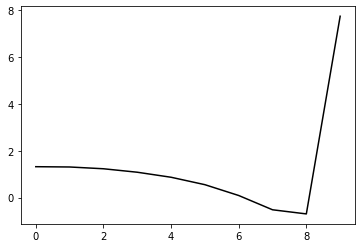

85000 0.30592206510075426
0.1840825731684005 -0.28519377518919226 0.17728053475645586 0.07770148357102108
[ 1.40239427  1.29752861  1.18979934  1.05755485  0.8693182   0.57752694
  0.13838335 -0.45284724 -0.62943637  7.75135264]


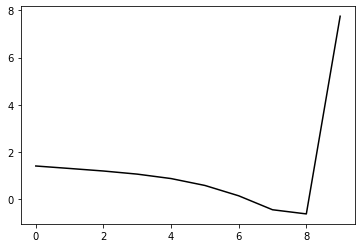

86000 0.27292210321609134
0.19379928710454458 -0.27987358896973874 0.17823299868031306 0.07062177246968669
[ 1.30042125  1.30016045  1.21786693  1.07460971  0.86000619  0.54610773
  0.10092014 -0.48777138 -0.66936339  7.75762954]


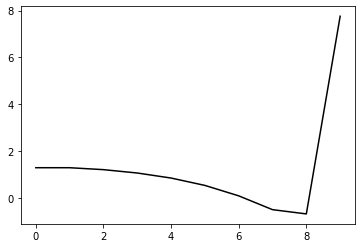

87000 0.21575592708669816
0.18382524039024561 -0.2869465374109965 0.18090566815760564 0.07029808269564237
[ 1.38083862  1.20646717  1.07807396  0.92850811  0.72596644  0.4290868
 -0.01793552 -0.62245265 -0.82248123  7.73524015]


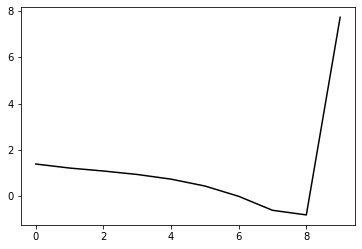

88000 0.20350250073253973
0.18710604122823177 -0.2808083814040334 0.17906664374493958 0.07329141370763992
[ 1.36535221  1.27113235  1.17727336  1.05137697  0.85211495  0.53312725
  0.07216292 -0.53261472 -0.73230947  7.73165447]


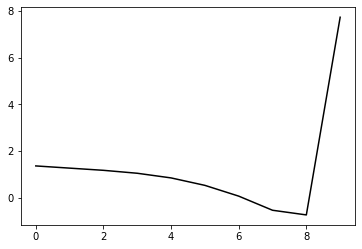

89000 0.218173408242617
0.19035621812781447 -0.280841937284939 0.1800953162273982 0.0733584816604491
[ 1.30649938  1.29090067  1.20719432  1.05755572  0.84623236  0.52513567
  0.06225611 -0.54243507 -0.7277222   7.74396725]


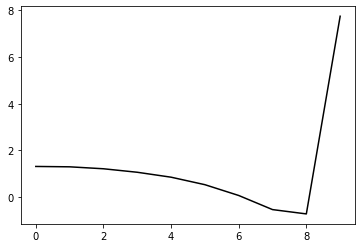

90000 0.2527418348822209
0.1817564825727803 -0.2874971240408463 0.18239491282795092 0.07897916306315572
[ 1.36572328  1.29071169  1.17634776  0.98849623  0.72525085  0.38346538
 -0.07321178 -0.66060131 -0.826334    7.71560239]


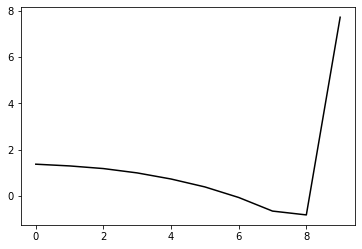

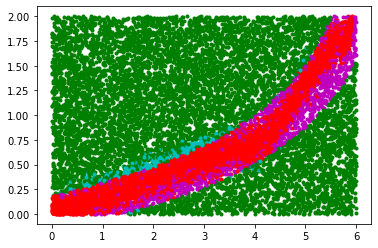

91000 0.24988733161190338
0.19242136342633934 -0.28137044183224913 0.18266582138019763 0.07744071518389371
[ 1.3177148   1.3092796   1.24843915  1.06295629  0.78516568  0.416544
 -0.0788086  -0.71649973 -0.91887157  7.72392402]


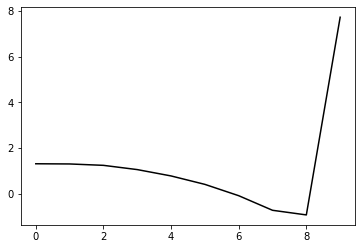

92000 0.22305212200300098
0.1920803399204248 -0.27912024834558397 0.1823515023044831 0.0770654019097986
[ 1.30287454e+00  1.27340046e+00  1.18126742e+00  1.02164863e+00
  8.03030415e-01  4.82762187e-01  4.44369335e-03 -6.47091870e-01
 -8.75649469e-01  7.70756816e+00]


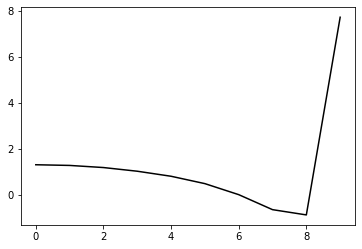

93000 0.218599932873765
0.18397824327035492 -0.2763854129919865 0.18043433696428748 0.07565246428969488
[ 1.35210222  1.24350218  1.09932423  0.94332827  0.7290172   0.41948343
 -0.02716881 -0.63584402 -0.85992923  7.73613093]


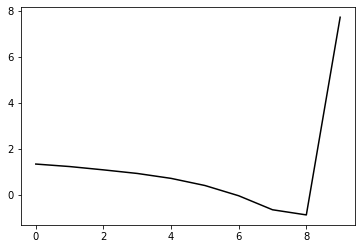

94000 0.15846635980637636
0.18539146928009934 -0.28283228946062455 0.18615433778755106 0.07376273589123113
[ 1.3324036   1.20050913  1.03190192  0.88351561  0.68076777  0.3764094
 -0.06918821 -0.6679561  -0.86446466  7.71727611]


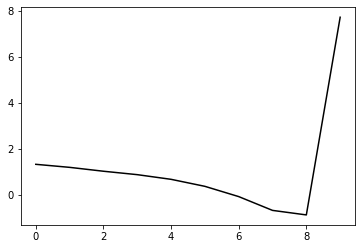

95000 0.2601769133884928
0.18795963023399756 -0.2741570301391369 0.18298222473295087 0.07323242537731654
[ 1.32499484  1.28859816  1.21380853  1.07387491  0.85612736  0.53694858
  0.07563935 -0.53318657 -0.728498    7.74232662]


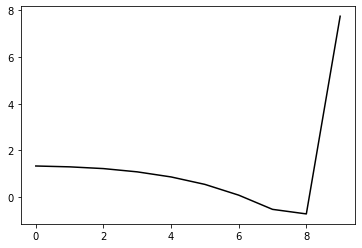

96000 0.14416789080692594
0.1941163794739034 -0.27248515734953555 0.18322822857532445 0.07411539666235104
[ 1.31585406  1.31453789  1.22871237  1.04284786  0.77882169  0.43279109
 -0.04277999 -0.66992611 -0.88479417  7.73276353]


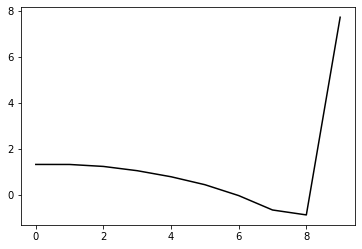

97000 0.22798917745156566
0.1907056786167052 -0.2705052963875428 0.18240059847213314 0.07401612179643514
[ 1.34958476  1.30223685  1.25683018  1.13381976  0.92219179  0.60692059
  0.13752777 -0.49665919 -0.71865243  7.74360846]


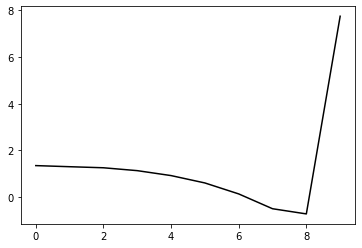

98000 0.2173998951464984
0.1891369855554777 -0.2696511764880132 0.18287752392527754 0.07250761742300792
[ 1.31851685  1.29519849  1.20622742  1.05002024  0.84260238  0.54392921
  0.10360918 -0.48618794 -0.67906271  7.75462847]


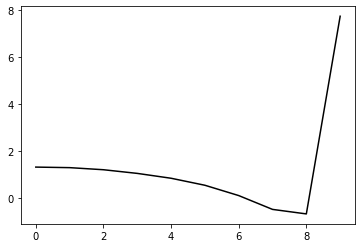

99000 0.2009476983496795
0.18968189468053384 -0.27227366069232345 0.18520891408531873 0.07589857358701438
[ 1.34518341  1.28021997  1.1616222   0.99462285  0.76615644  0.4401581
 -0.01917654 -0.62282151 -0.81532946  7.72046898]


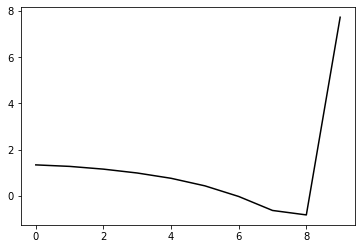

In [71]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for j in range (10000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, m2, lam, alpha, beta, Positive[j%set], Negative[j%set])
        gradients=g.gradient(loss, [h, m2, lam, alpha, beta])
        if np.isnan(loss)==True: break
    for i in range (90):
        optimizer.apply_gradients(zip(gradients, [h]))
        if any(np.isnan(h.numpy()))==True: break
    for i in range (10):
        optimizer.apply_gradients(zip(gradients, [h, m2, lam, alpha, beta]))
        if any(np.isnan(h.numpy()))==True: break
    if j%100==0: 
        print(j*10, Error_func(h, m2, lam, alpha, beta, Positive[np.int32((j/set)%set)], Negative[np.int32((j/set)%set)]).numpy())
        print(m2.numpy(), lam.numpy(), alpha.numpy(), beta.numpy()), print(h.numpy())
        plt.plot(h.numpy(), 'k-'), plt.show()
    if j%1000==0:
        for i in range (set):
            [Positive0[i], Positive1[i]]=NN_func_01(h, m2, lam, alpha, beta, Positive[i])
            [Negative0[i], Negative1[i]]=NN_func_01(h, m2, lam, alpha, beta, Negative[i])
        for i in range (set):
            x_data1[i]=[v[0] for v in Positive0[i]]
            y_data1[i]=[v[1] for v in Positive0[i]]
            x_data2[i]=[v[0] for v in Positive1[i]]
            y_data2[i]=[v[1] for v in Positive1[i]]
            x_data3[i]=[v[0] for v in Negative0[i]]
            y_data3[i]=[v[1] for v in Negative0[i]]
            x_data4[i]=[v[0] for v in Negative1[i]]
            y_data4[i]=[v[1] for v in Negative1[i]]
            plt.plot(x_data4[i], y_data4[i], 'g.')
            plt.plot(x_data2[i], y_data2[i], 'c.')
            plt.plot(x_data1[i], y_data1[i], 'r.')
            plt.plot(x_data3[i], y_data3[i], 'm.')
        plt.show()

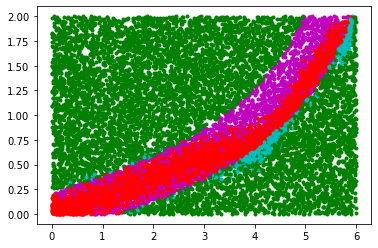

In [72]:
for i in range (set):
    [Positive0[i], Positive1[i]]=NN_func_01(h, m2, lam, alpha, beta, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, m2, lam, alpha, beta, Negative[i])
for i in range (set):
    x_data1[i]=[v[0] for v in Positive0[i]]
    y_data1[i]=[v[1] for v in Positive0[i]]
    x_data2[i]=[v[0] for v in Positive1[i]]
    y_data2[i]=[v[1] for v in Positive1[i]]
    x_data3[i]=[v[0] for v in Negative0[i]]
    y_data3[i]=[v[1] for v in Negative0[i]]
    x_data4[i]=[v[0] for v in Negative1[i]]
    y_data4[i]=[v[1] for v in Negative1[i]]
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'c.')
    plt.plot(x_data1[i], y_data1[i], 'r.')
    plt.plot(x_data3[i], y_data3[i], 'm.')
plt.show()

99990 0.28669746056787915
0.18606776963083227 -0.28073094409884397 0.19077509582185084 0.07135067227334428
[ 1.32218897  1.18146279  0.97815752  0.80781261  0.61697976  0.32433367
 -0.12345777 -0.73350102 -0.92773743  7.67297761]


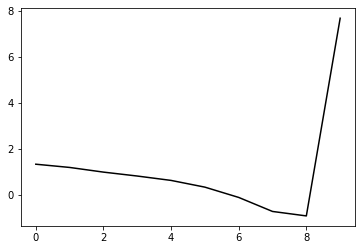

([<matplotlib.lines.Line2D at 0x23ff762eb08>], None)

In [74]:
print(j*10, Error_func(h, m2, lam, alpha, beta, Positive[np.int32((j/set)%set)], Negative[np.int32((j/set)%set)]).numpy())
print(m2.numpy(), lam.numpy(), alpha.numpy(), beta.numpy()), print(h.numpy())
plt.plot(h.numpy(), 'k-'), plt.show()